In [53]:
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

In [54]:
lc1 = fits.open('AS1A10_056T01_9000004598_31558cztM0_level2_quad_clean_Q0.lc')
lc2 = fits.open('AS1A10_056T01_9000004598_31558cztM0_level2_quad_clean_Q1.lc')
lc3 = fits.open('AS1A10_056T01_9000004598_31558cztM0_level2_quad_clean_Q2.lc')
lc4 = fits.open('AS1A10_056T01_9000004598_31558cztM0_level2_quad_clean_Q3.lc')

lc1_data = lc1[1].data
lc2_data = lc2[1].data
lc3_data = lc3[1].data
lc4_data = lc4[1].data

lc = [lc1_data, lc2_data, lc3_data, lc4_data]

In [55]:
lc_sum = np.array(lc[0].field('RATE')+lc[1].field('RATE')+lc[2].field('RATE')+lc[3].field('RATE'))

In [56]:
grb_time = 365317050.5
grb_ind = np.where(lc[0].field('TIME')==grb_time)[0][0]

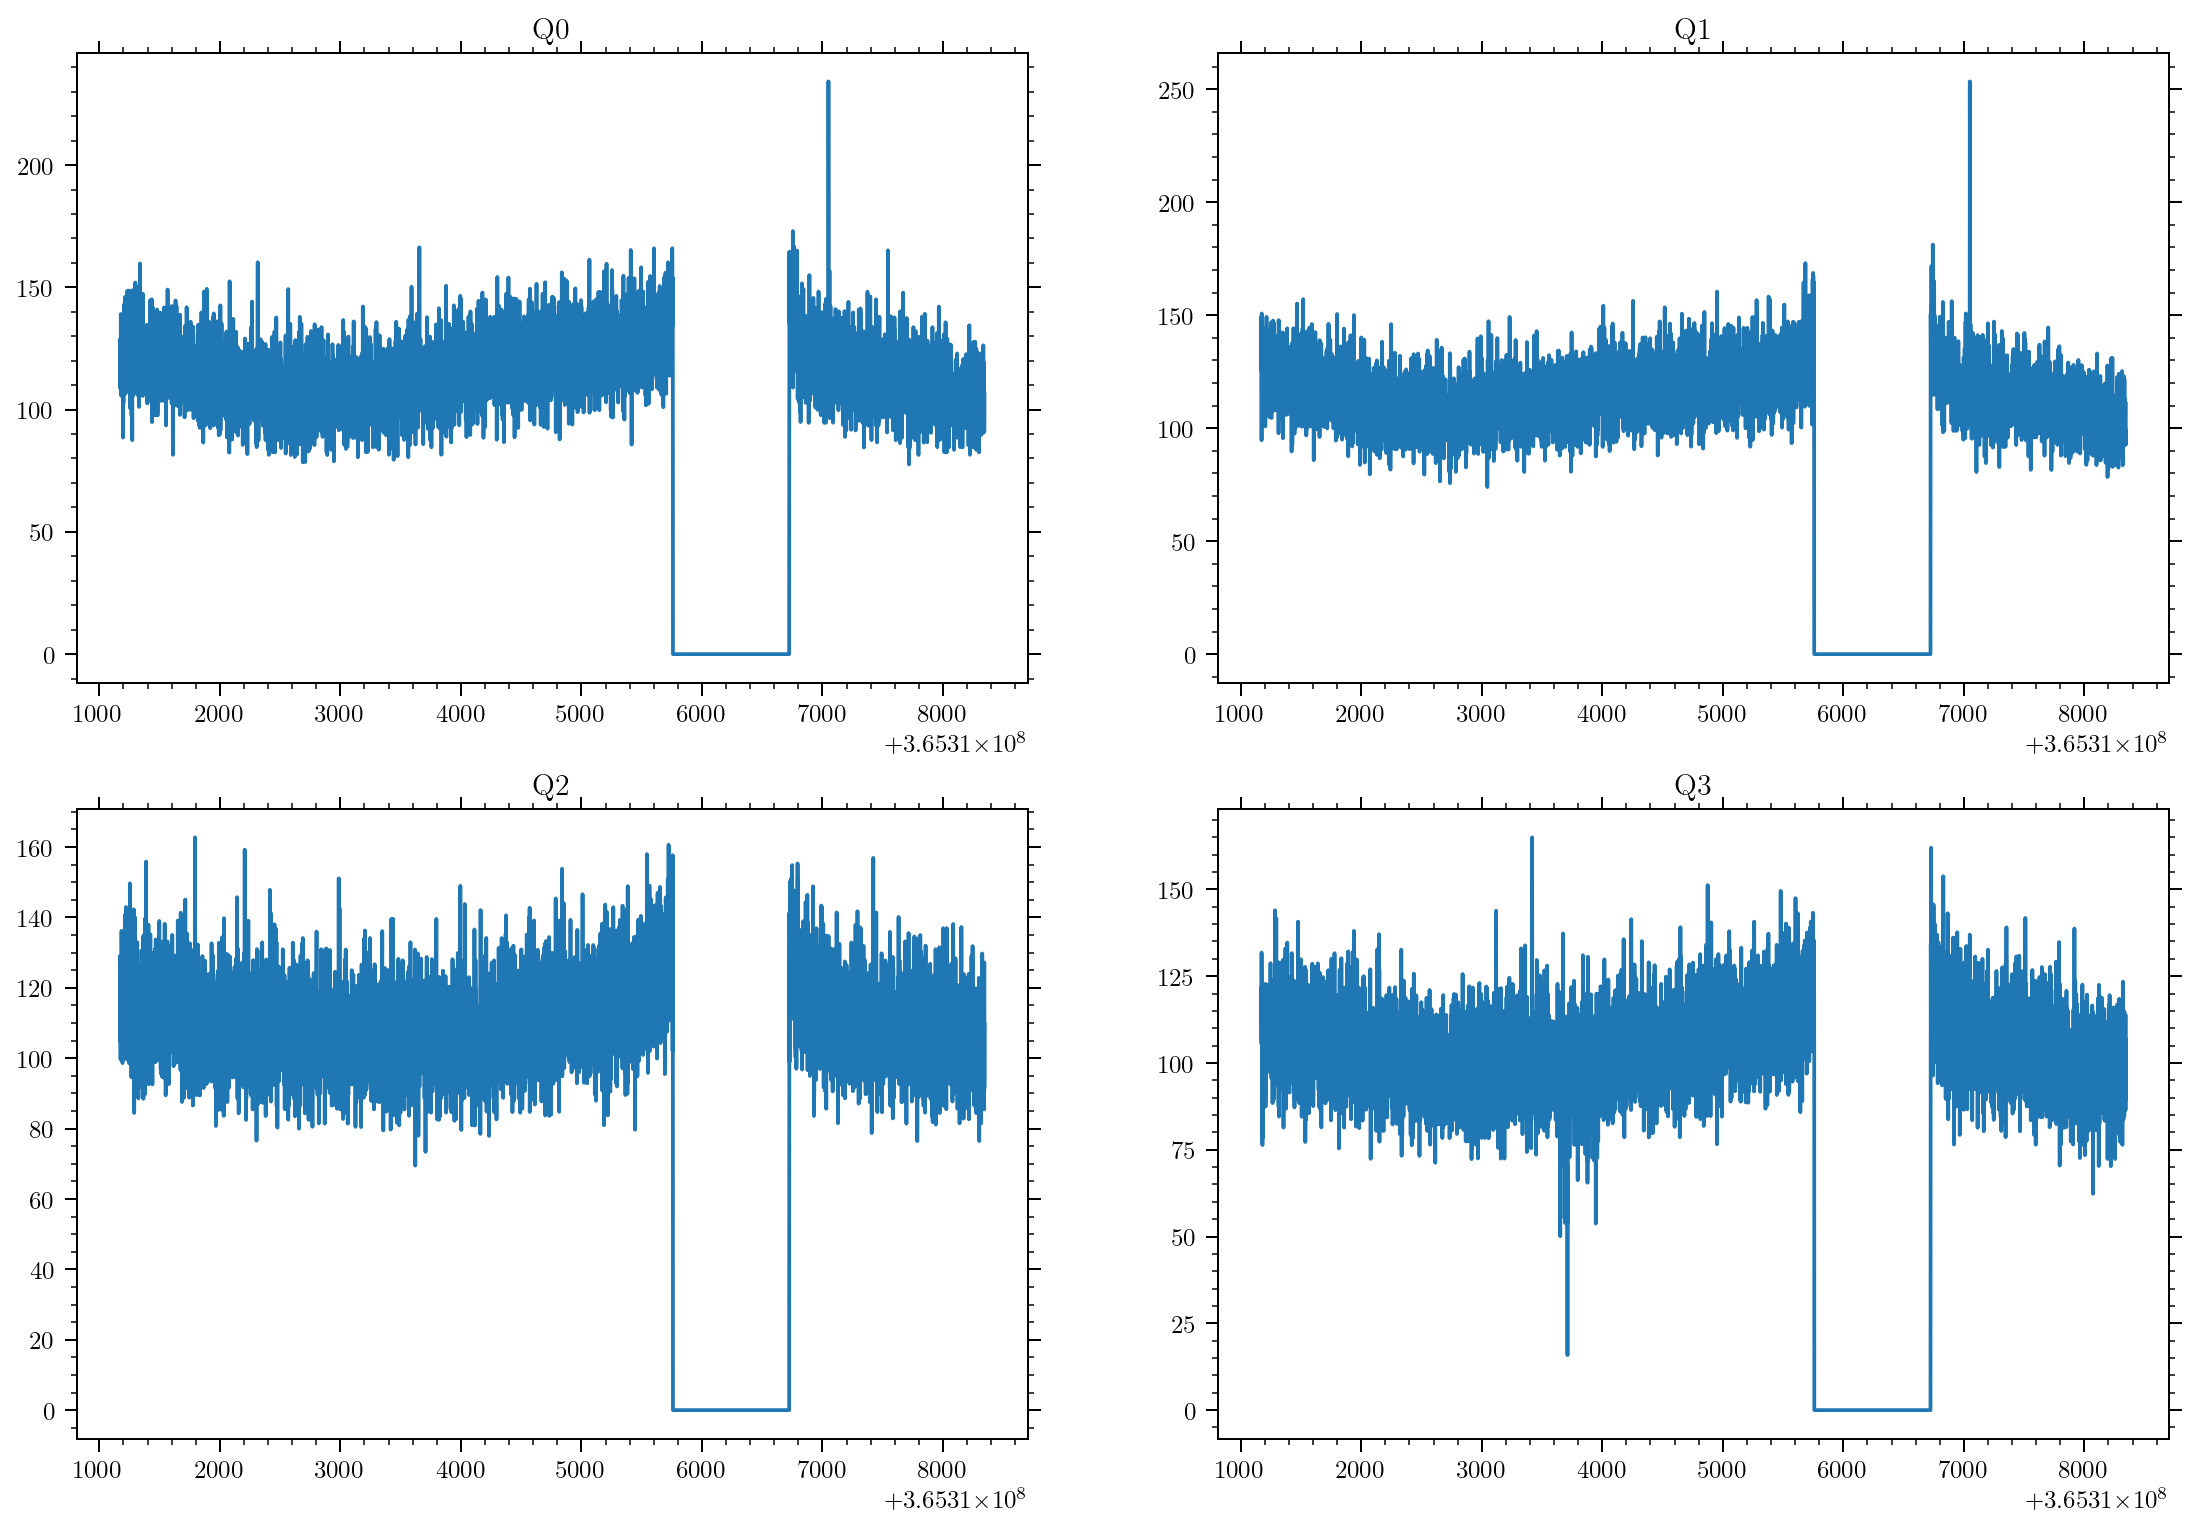

In [57]:
plt.figure(dpi=180, figsize=(15,10))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.plot(lc[i].field('TIME'), lc[i].field('RATE'))
    plt.title('Q'+str(i))
plt.show()

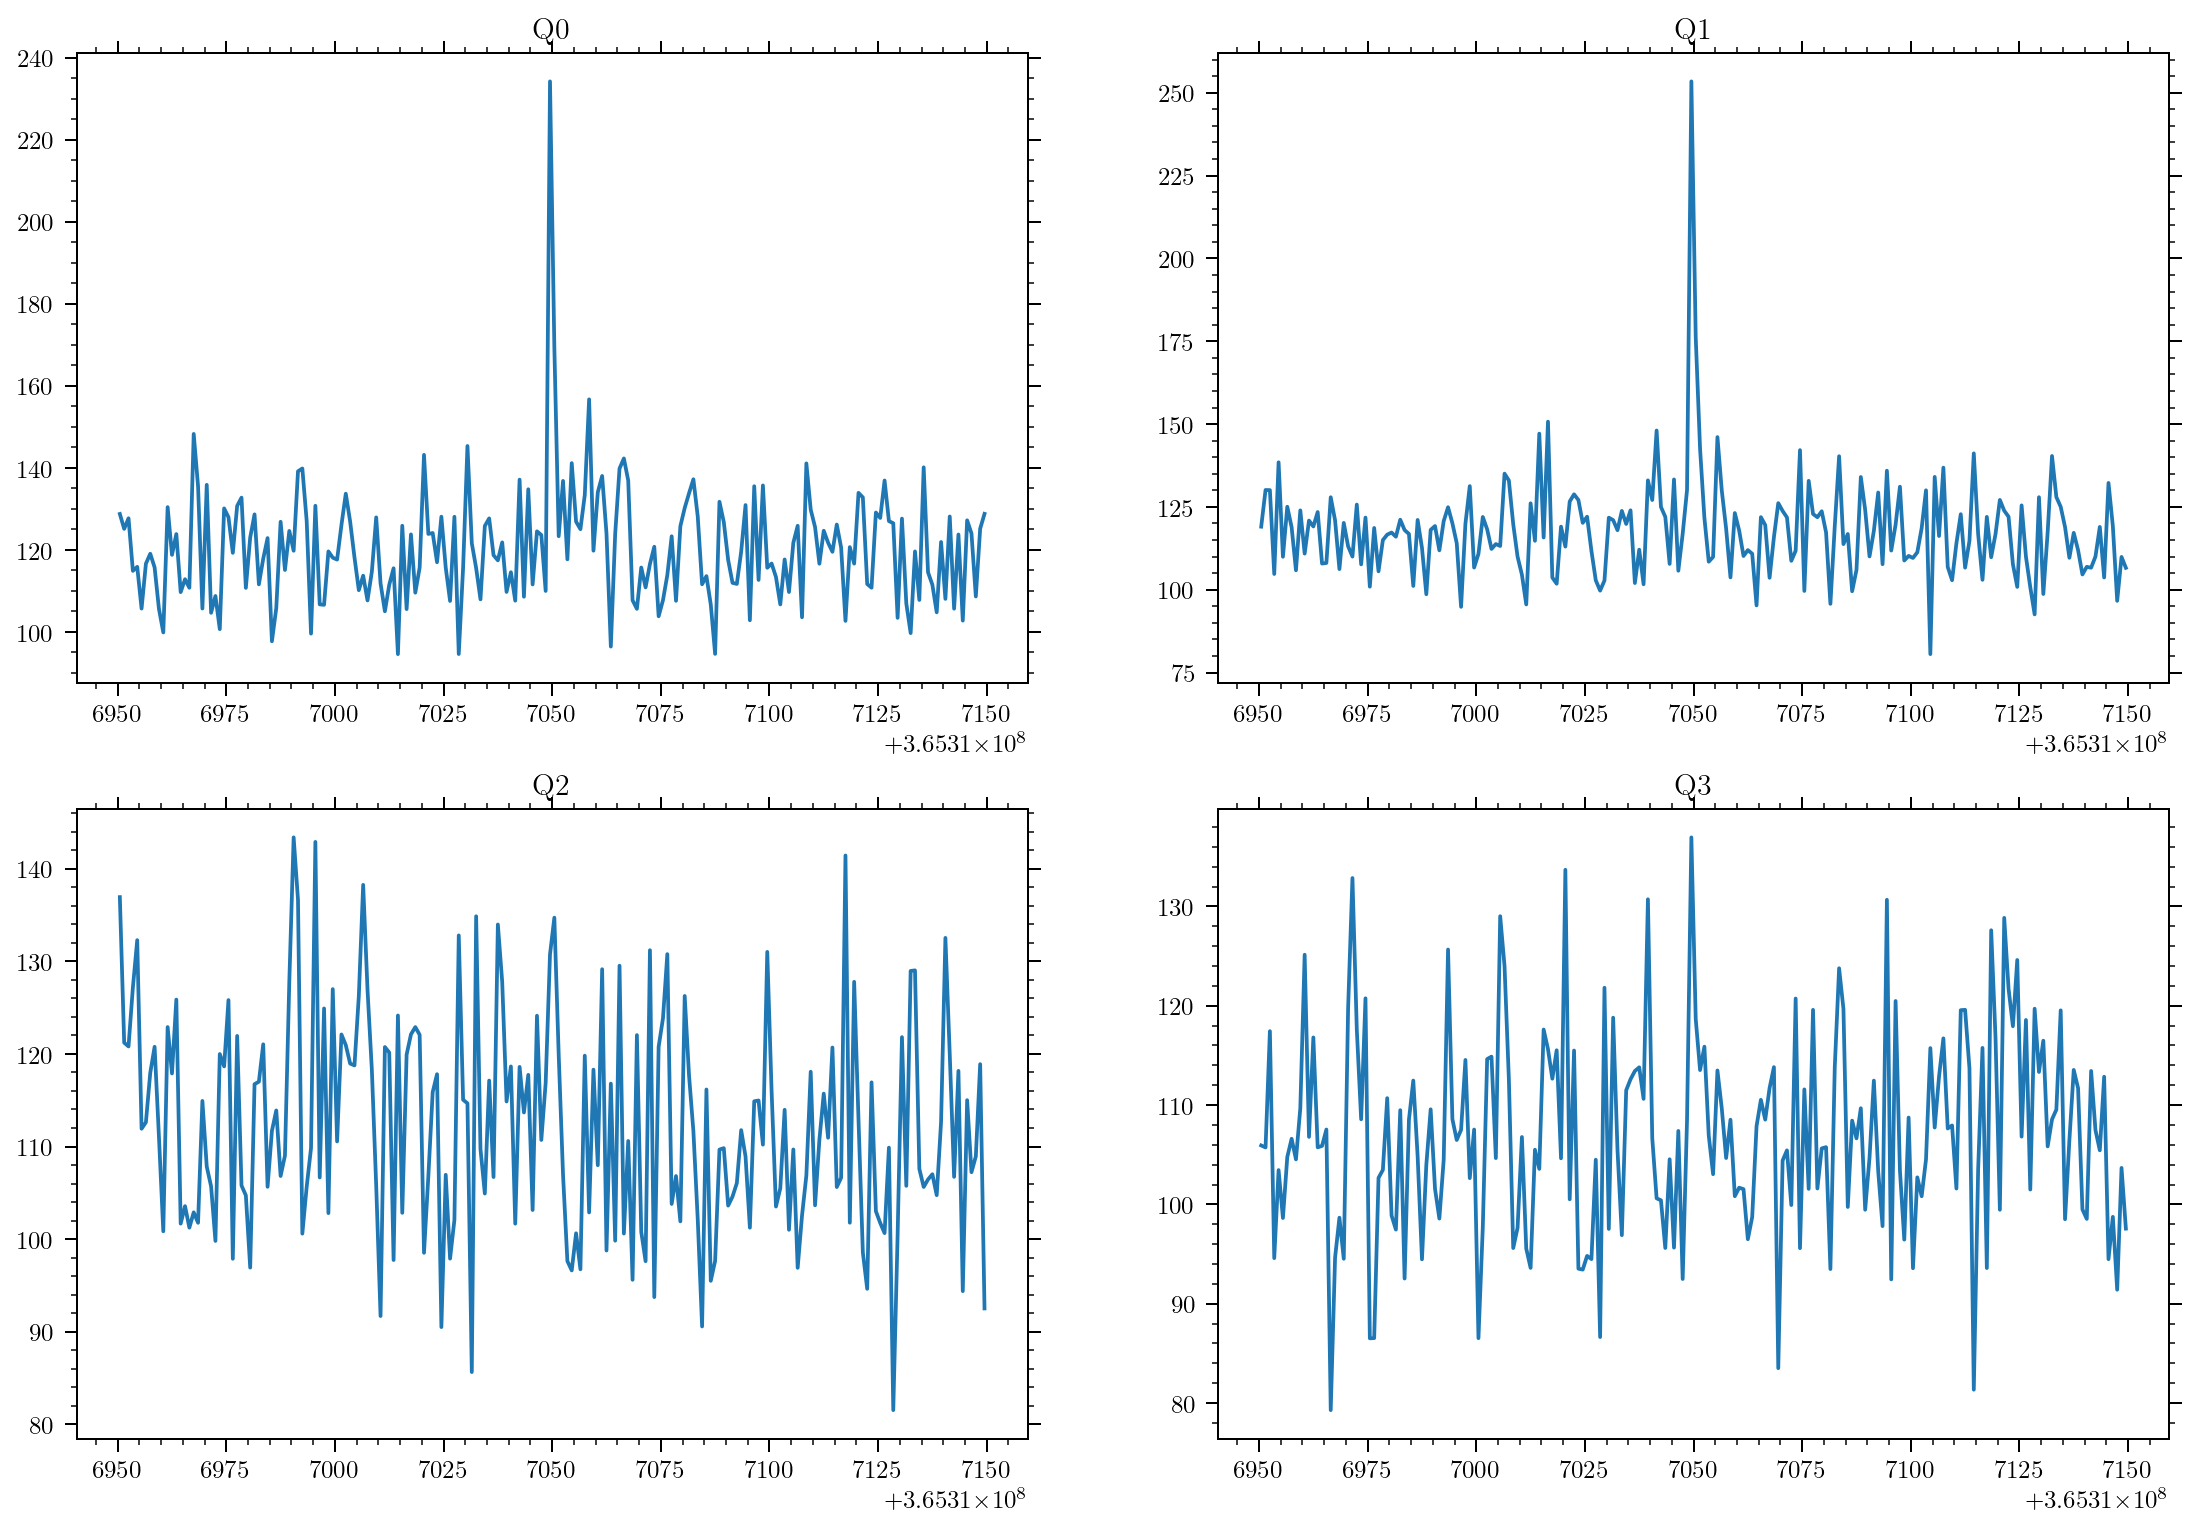

In [58]:
plt.figure(dpi=180, figsize=(15,10))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.plot(lc[i].field('TIME')[grb_ind-100:grb_ind+100], lc[i].field('RATE')[grb_ind-100:grb_ind+100])
    plt.title('Q'+str(i))
plt.show()

In [59]:
def zero_runs(a):
    # Create an array that is 1 where a is 0, and pad each end with an extra 0.
    iszero = np.concatenate(([0], np.equal(a, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges

In [60]:
def get_saa(lc_data):
    saa_index = np.where(zero_runs(lc_data)[:,1] - zero_runs(lc_data)[:,0] == np.max(zero_runs(lc_data)[:,1] - zero_runs(lc_data)[:,0]))[0][0]
    saa_start = zero_runs(lc_data)[saa_index][0]
    saa_end = zero_runs(lc_data)[saa_index][-1]
    return (saa_start, saa_end)

In [61]:
def detrend_func(lc_data, grb_ind, out_t):
    max_ind = grb_ind
    saa_start_ind, saa_end_ind = get_saa(lc_data)
    lc_detrend = np.zeros_like(lc_data)
    lc_detrend[saa_end_ind:(max_ind)] = lc_data[saa_end_ind:(max_ind)] - np.median(lc_data[:saa_start_ind])
    lc_detrend[:saa_start_ind] = lc_data[:saa_start_ind] - signal.savgol_filter(lc_data[:(saa_start_ind)], int(100/out_t), 2)
    lc_detrend[max_ind:] = lc_data[max_ind:] - signal.savgol_filter(lc_data[max_ind:], int(100/out_t), 2)
    return(lc_detrend)

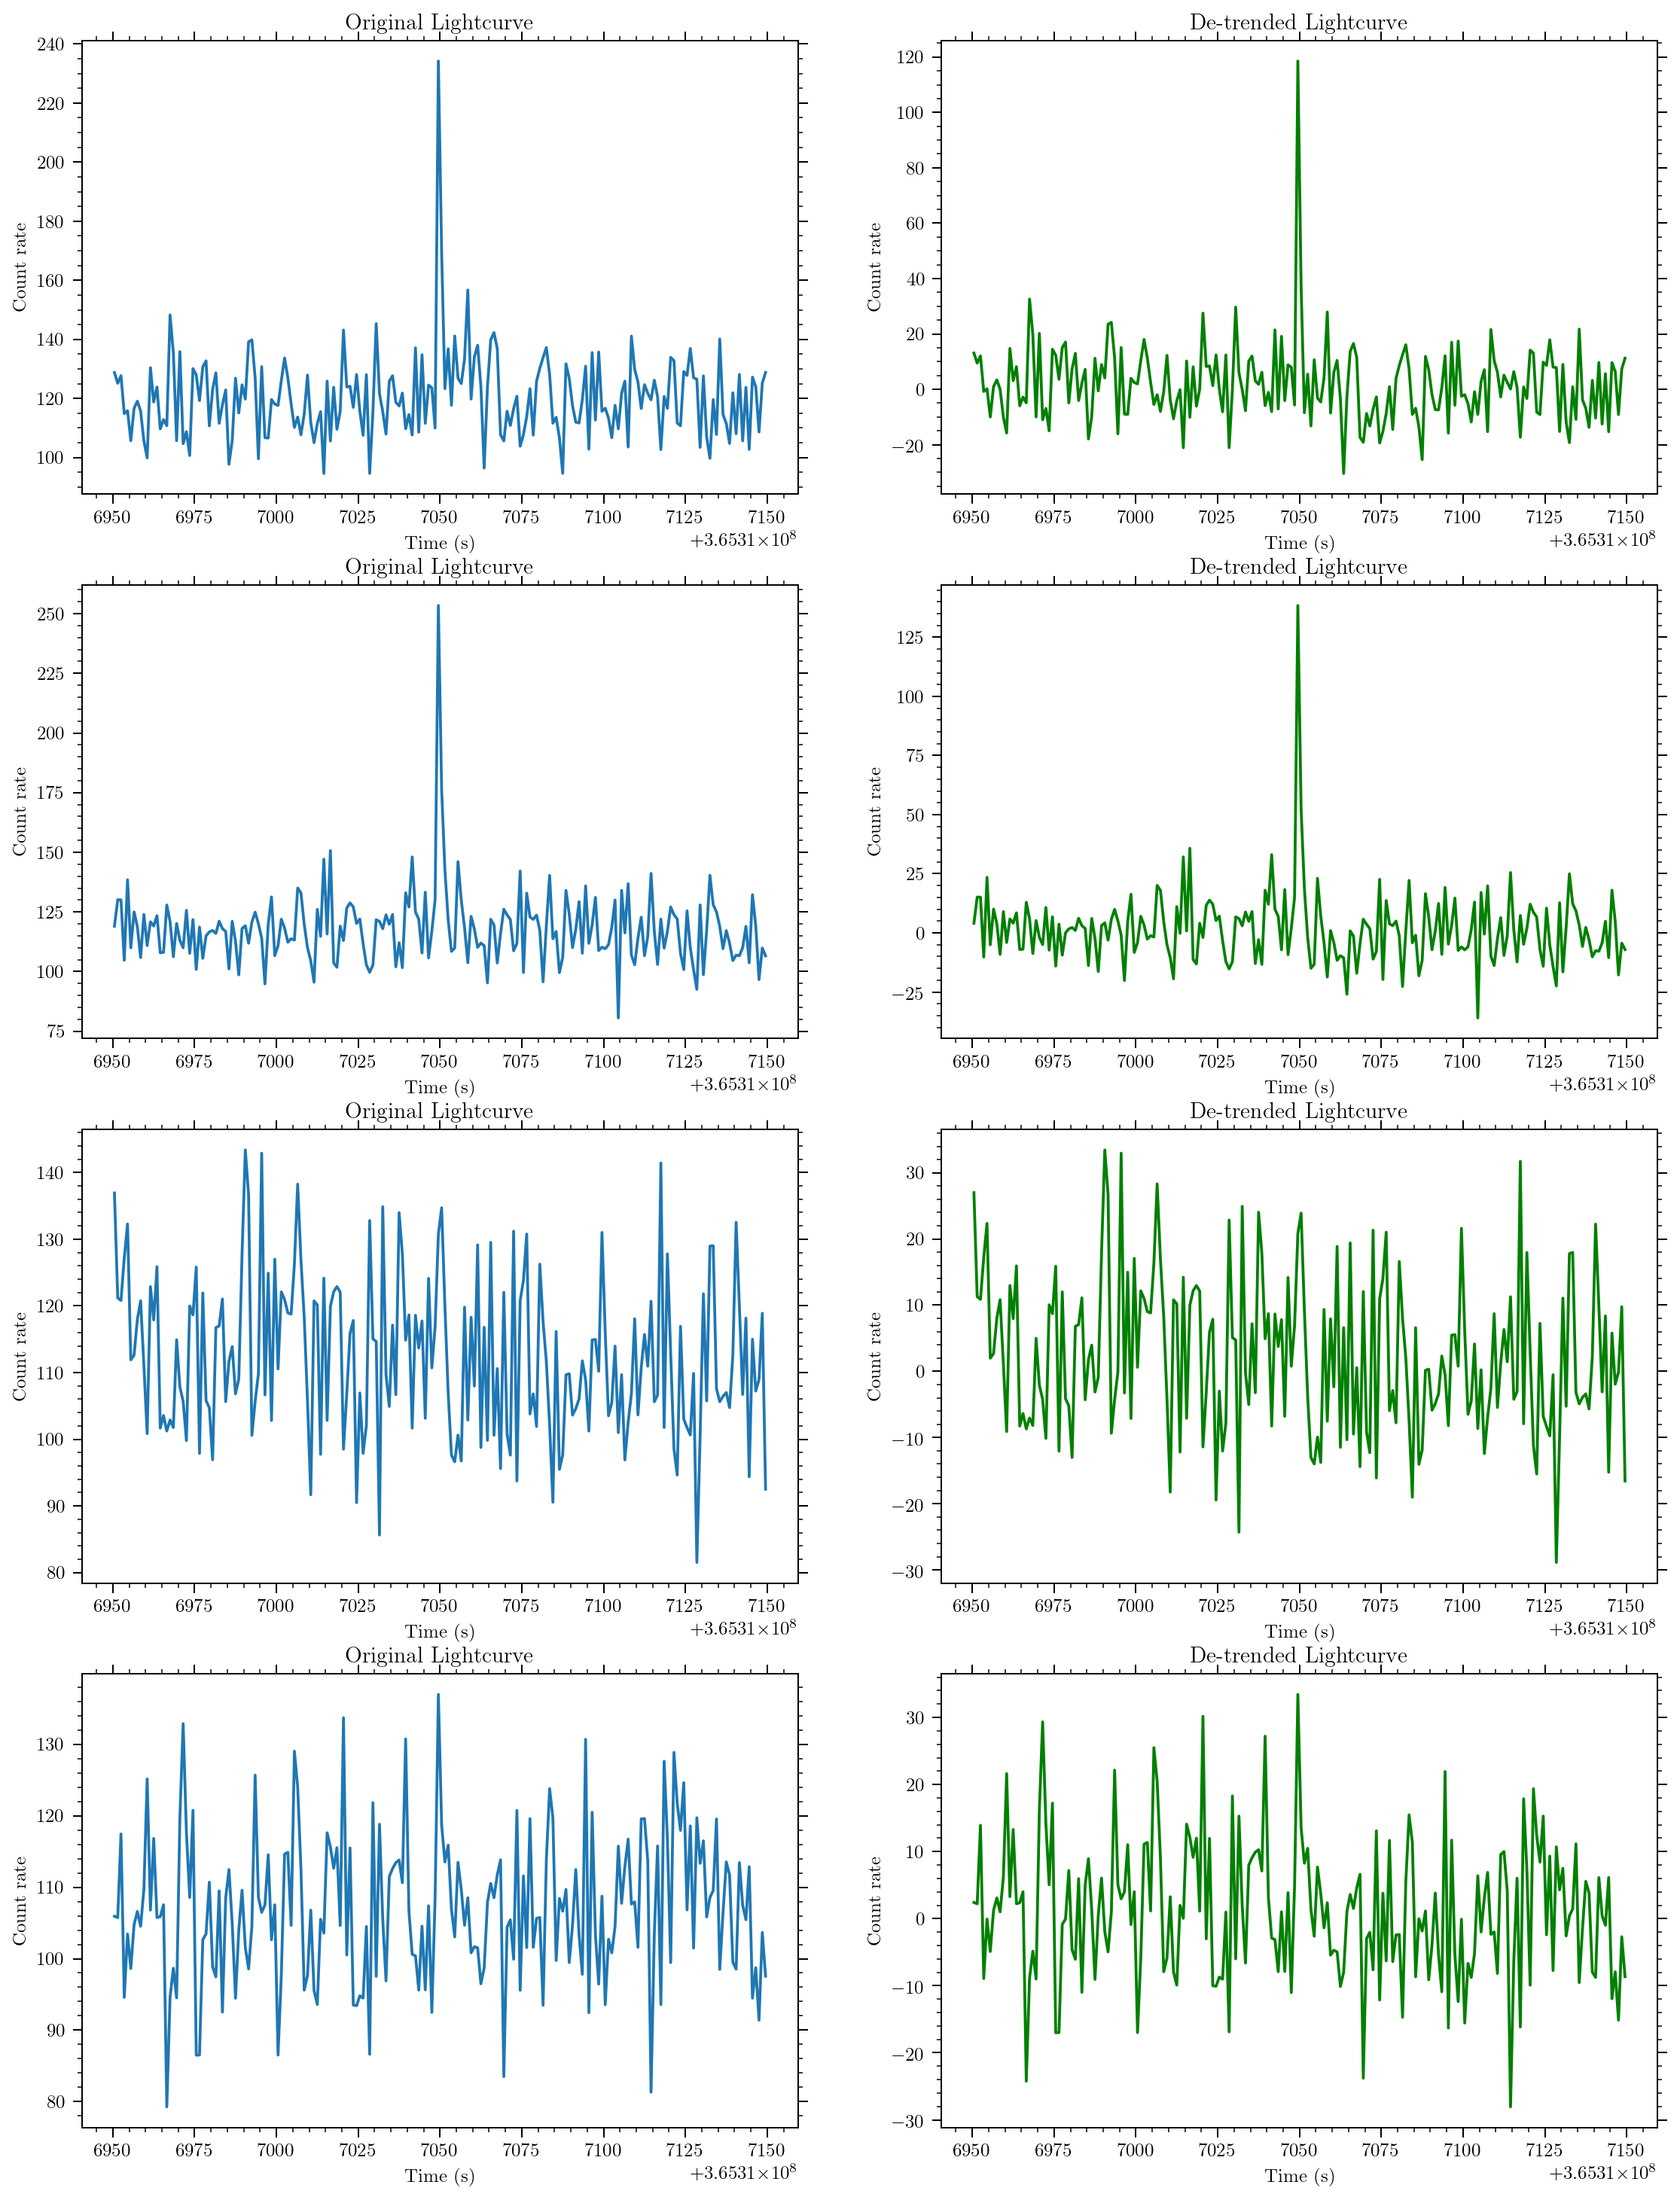

In [62]:
plt.figure(dpi=180, figsize=(15,20))
o = [1,3,5,7]
e = [2,4,6,8]
for i in range(0,4):   
    plt.subplot(4,2,o[i])
    plt.title('Original Lightcurve')
    plt.plot(lc[i].field('TIME')[grb_ind-100:grb_ind+100], lc[i].field('RATE')[grb_ind-100:grb_ind+100])
    plt.xlabel('Time (s)')
    plt.ylabel('Count rate')
    plt.subplot(4,2,e[i])
    plt.title('De-trended Lightcurve')
    plt.plot(lc[i].field('TIME')[grb_ind-100:grb_ind+100], detrend_func(lc[i].field('RATE'), grb_ind, 1)[grb_ind-100:grb_ind+100], 'g')
    plt.xlabel('Time (s)')
    plt.ylabel('Count rate')
plt.show()

In [63]:
lc1_0p1 = fits.open('AS1A10_056T01_9000004598_31558cztM0_level2_quad_clean_0p1_Q0.lc')
lc2_0p1 = fits.open('AS1A10_056T01_9000004598_31558cztM0_level2_quad_clean_0p1_Q1.lc')
lc3_0p1 = fits.open('AS1A10_056T01_9000004598_31558cztM0_level2_quad_clean_0p1_Q2.lc')
lc4_0p1 = fits.open('AS1A10_056T01_9000004598_31558cztM0_level2_quad_clean_0p1_Q3.lc')

lc1_0p1_data = lc1_0p1[1].data
lc2_0p1_data = lc2_0p1[1].data
lc3_0p1_data = lc3_0p1[1].data
lc4_0p1_data = lc4_0p1[1].data

lc_0p1 = [lc1_0p1_data, lc2_0p1_data, lc3_0p1_data, lc4_0p1_data]

In [64]:
lc_0p1_sum = np.array(lc_0p1[0].field('RATE')+lc_0p1[1].field('RATE')+lc_0p1[2].field('RATE')+lc_0p1[3].field('RATE'))

In [65]:
grb_time_0p1 = 365317050.05

In [66]:
grb_ind_0p1 = np.where(np.round(lc_0p1[0].field('TIME'),2)==grb_time_0p1)[0][0]

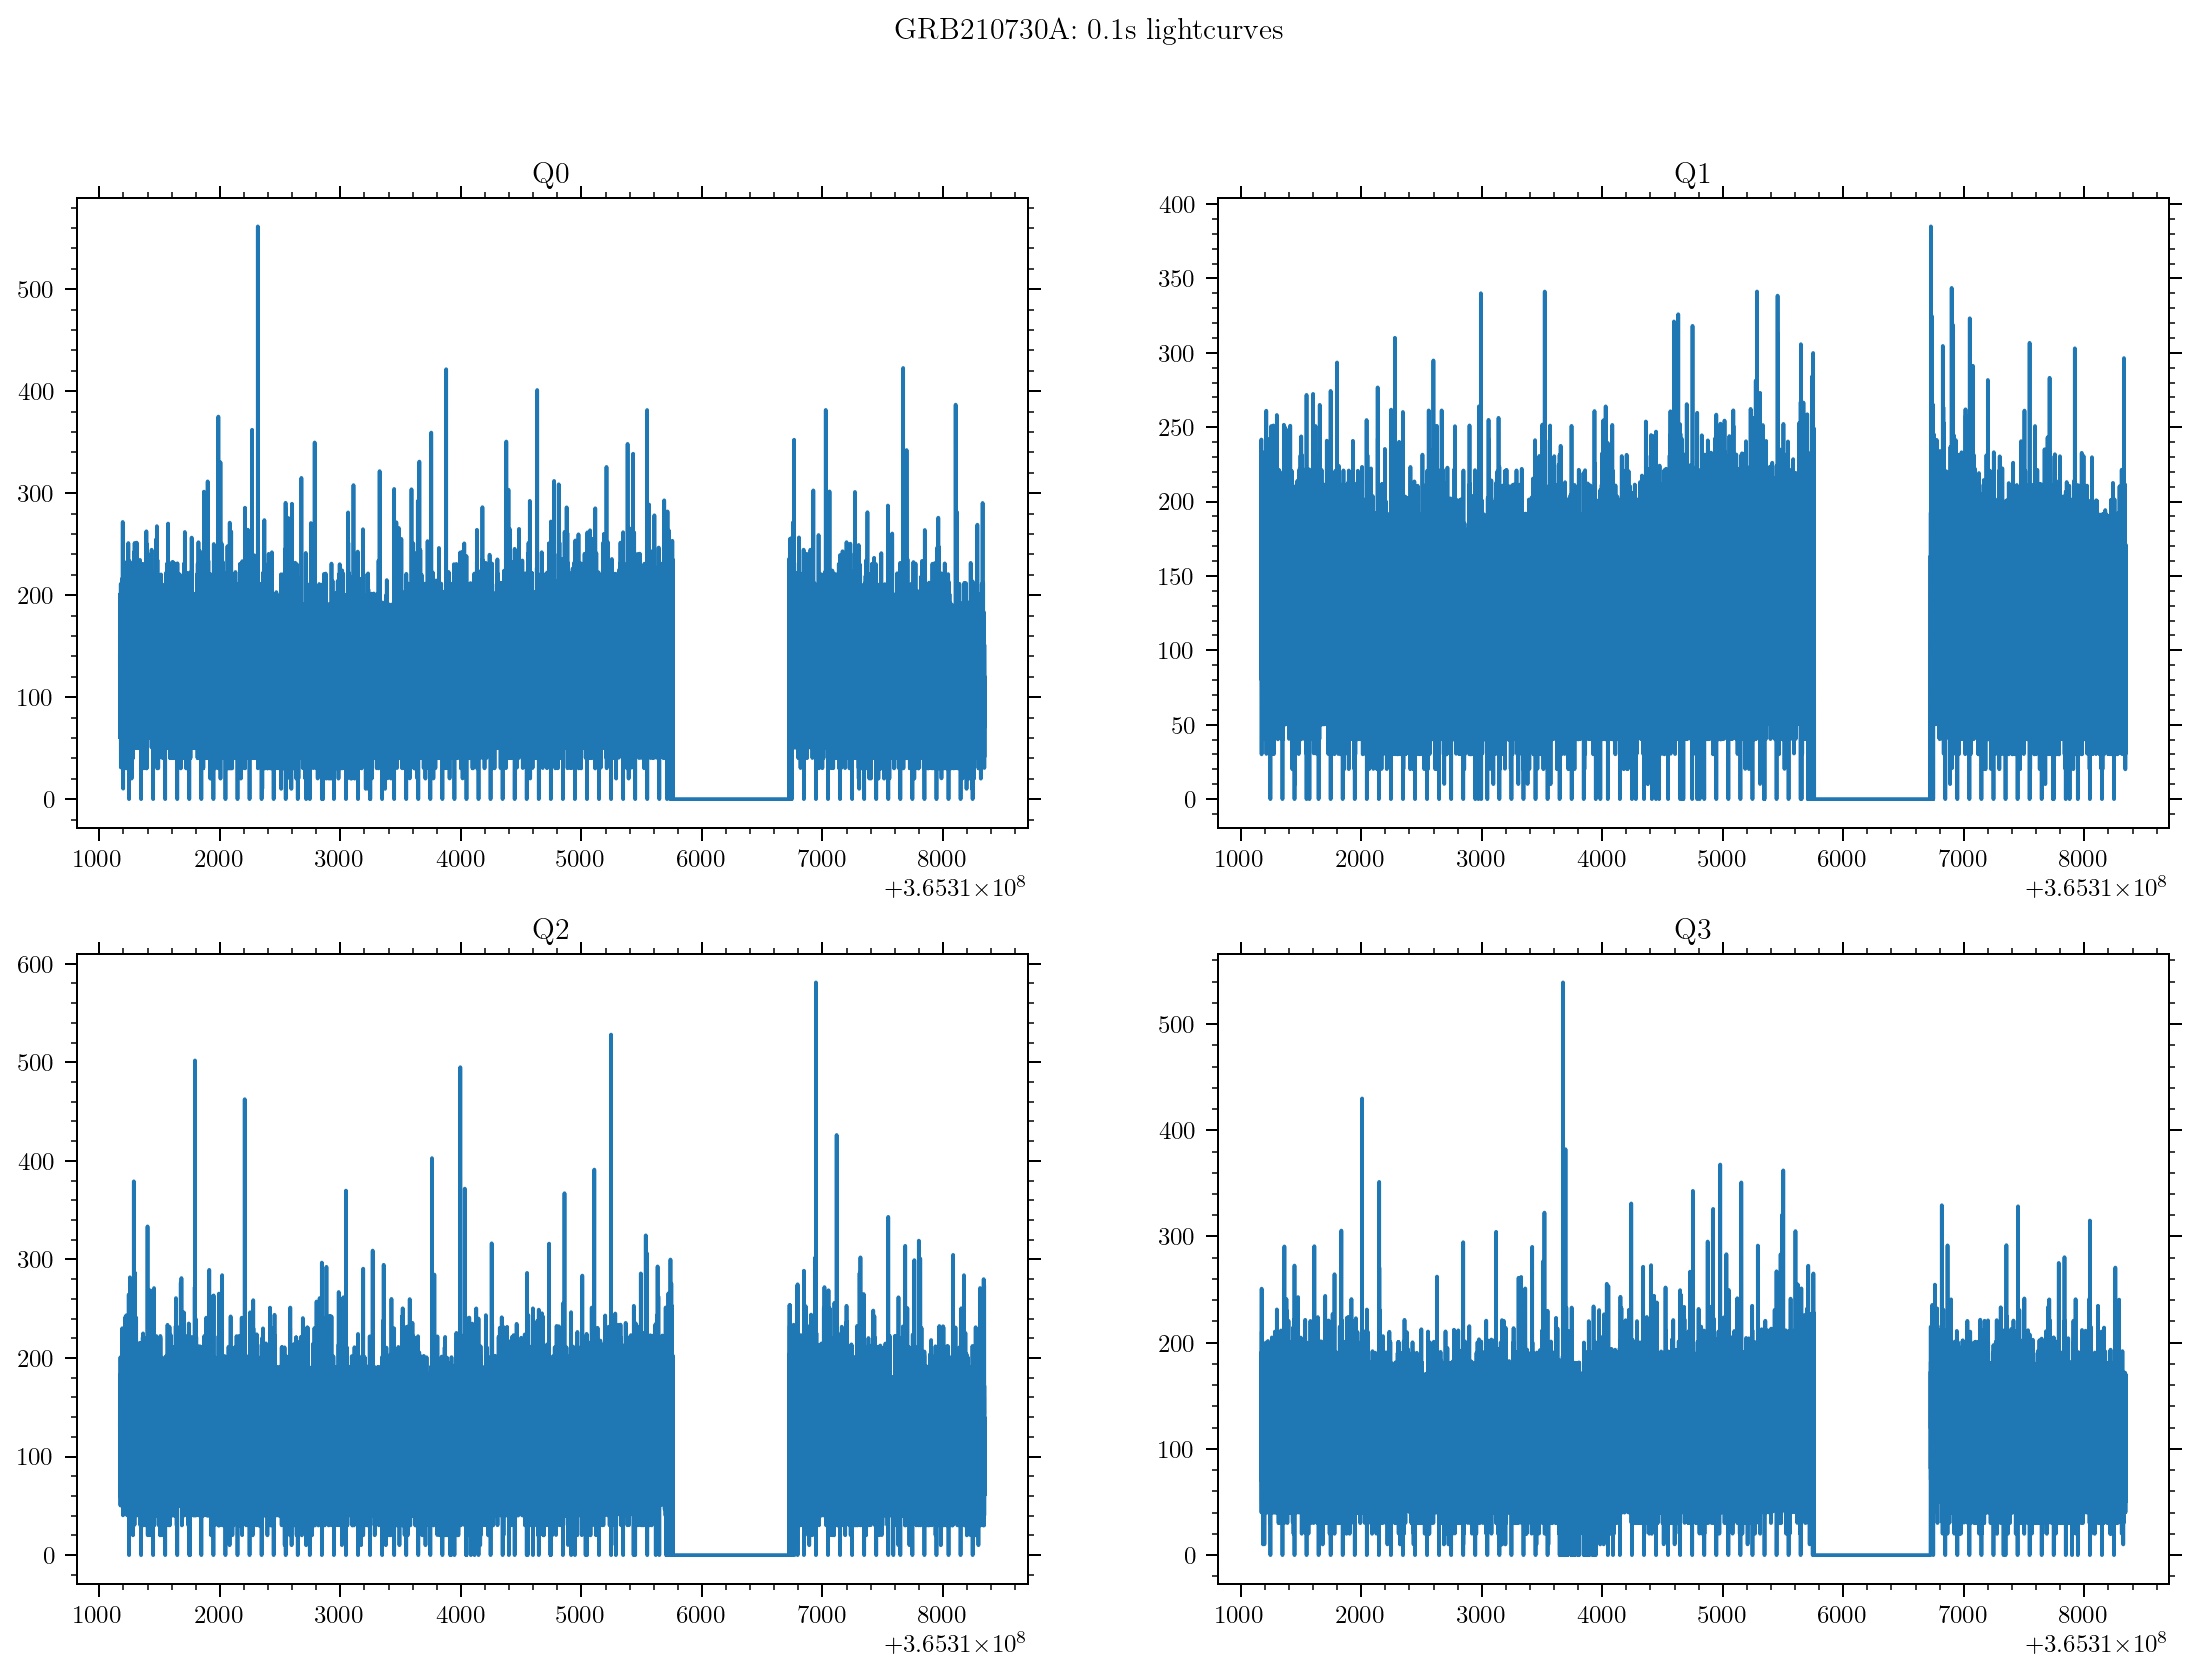

In [67]:
plt.figure(dpi=180, figsize=(15,10))
plt.suptitle('GRB210730A: 0.1s lightcurves')
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.plot(lc_0p1[i].field('TIME'), lc_0p1[i].field('RATE'))
    plt.title('Q'+str(i))
plt.show()

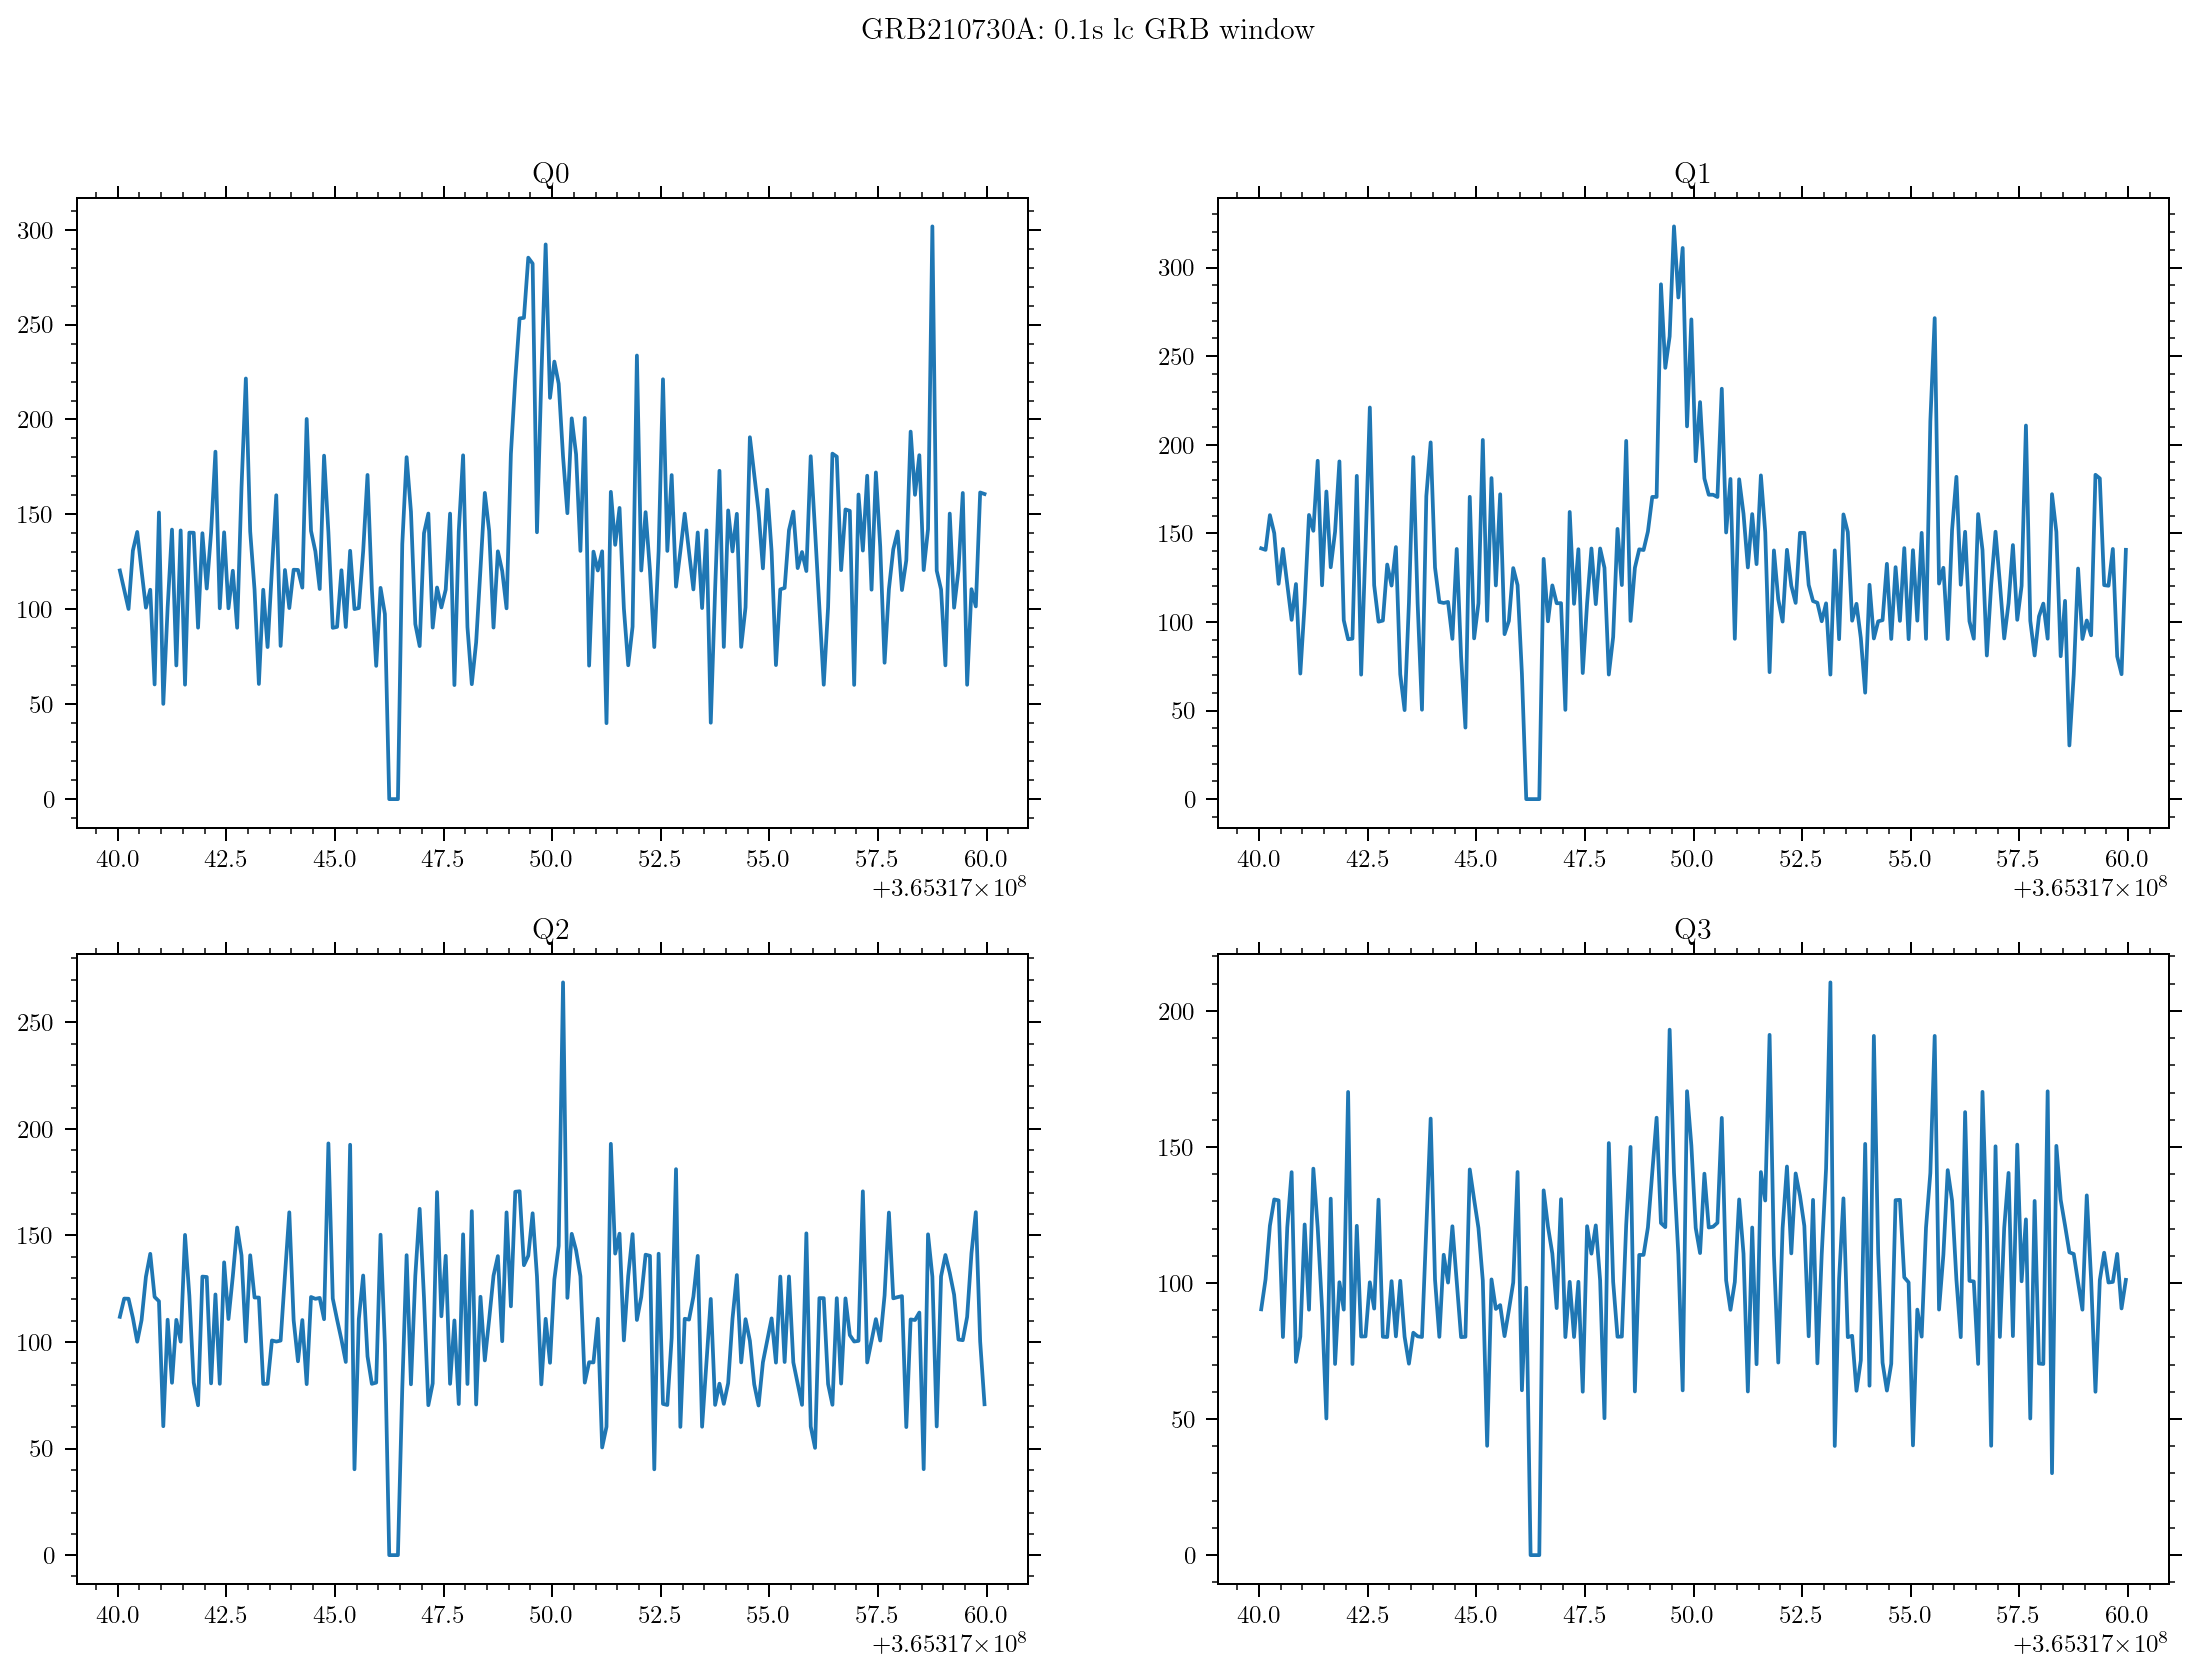

In [68]:
plt.figure(dpi=180, figsize=(15,10))
plt.suptitle('GRB210730A: 0.1s lc GRB window')
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.plot(lc_0p1[i].field('TIME')[grb_ind_0p1-100:grb_ind_0p1+100], lc_0p1[i].field('RATE')[grb_ind_0p1-100:grb_ind_0p1+100])
    plt.title('Q'+str(i))
plt.show()

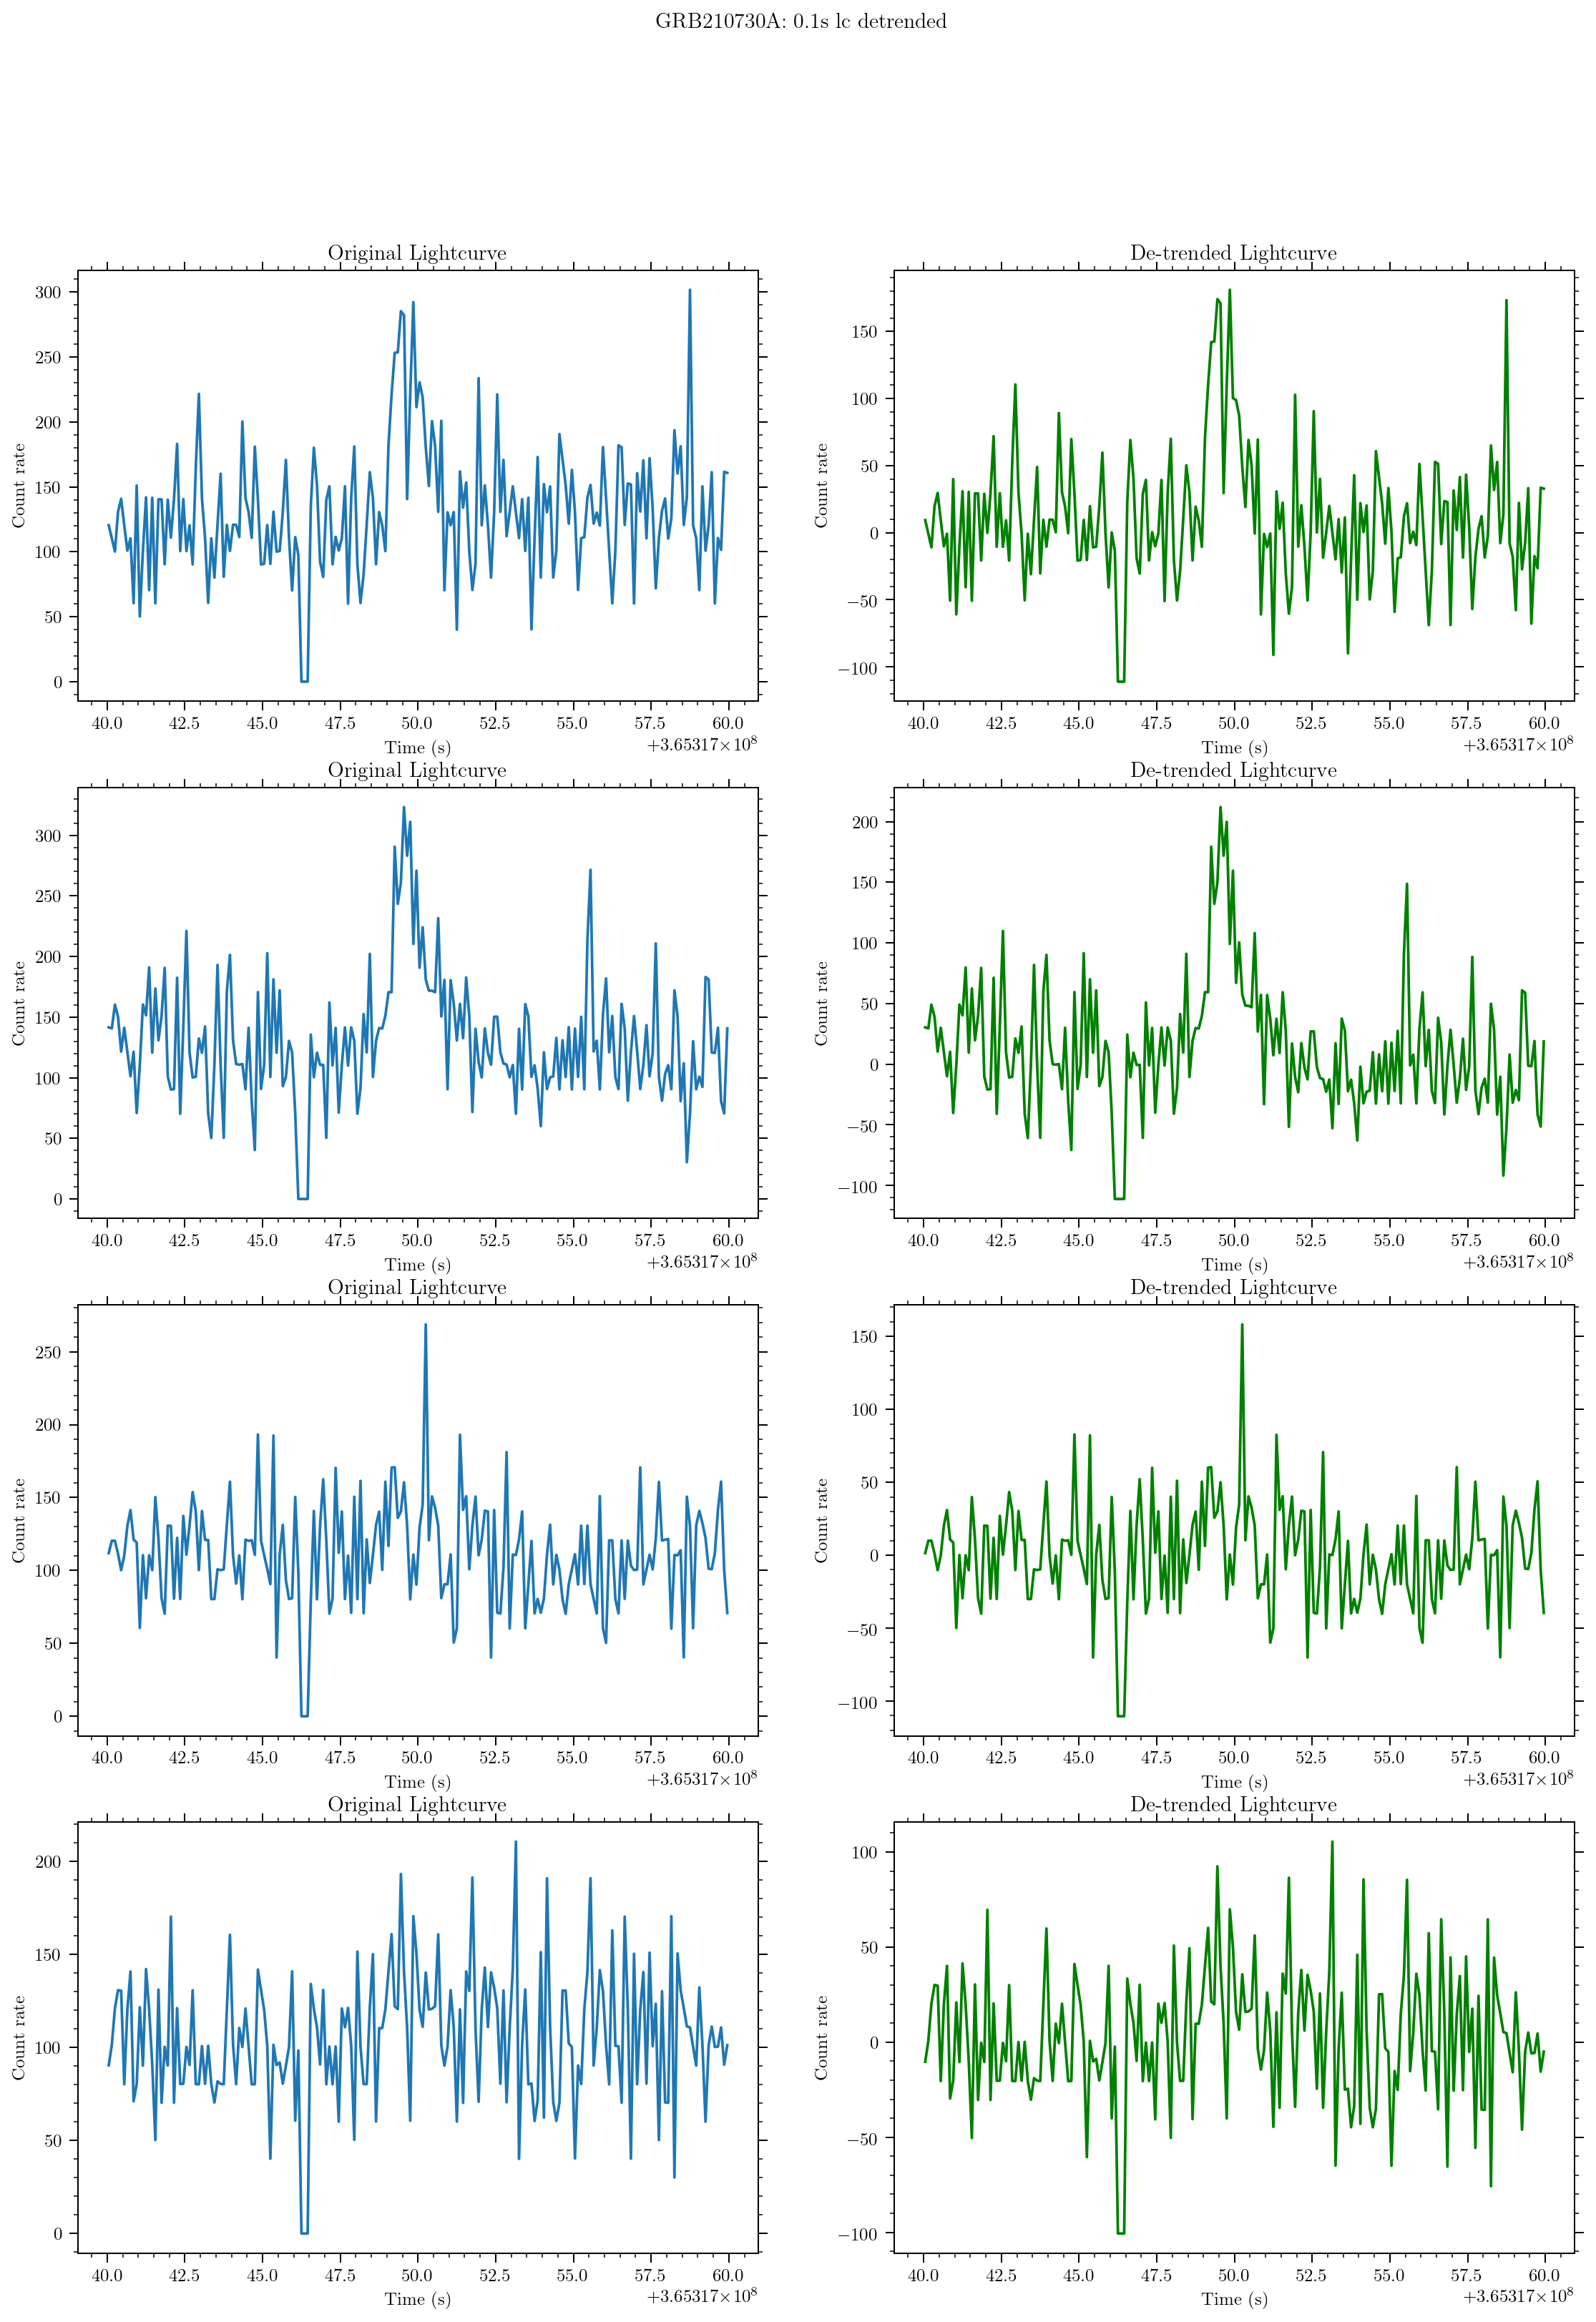

In [69]:
plt.figure(dpi=180, figsize=(15,20))
o = [1,3,5,7]
e = [2,4,6,8]
plt.suptitle('GRB210730A: 0.1s lc detrended')
for i in range(0,4):   
    plt.subplot(4,2,o[i])
    plt.title('Original Lightcurve')
    plt.plot(lc_0p1[i].field('TIME')[grb_ind_0p1-100:grb_ind_0p1+100], lc_0p1[i].field('RATE')[grb_ind_0p1-100:grb_ind_0p1+100])
    plt.xlabel('Time (s)')
    plt.ylabel('Count rate')
    plt.subplot(4,2,e[i])
    plt.title('De-trended Lightcurve')
    plt.plot(lc_0p1[i].field('TIME')[grb_ind_0p1-100:grb_ind_0p1+100], detrend_func(lc_0p1[i].field('RATE'), grb_ind_0p1, 0.1)[grb_ind_0p1-100:grb_ind_0p1+100], 'g')
    plt.xlabel('Time (s)')
    plt.ylabel('Count rate')
plt.show()

In [70]:
def bindata(data, t, time):
    n = int(time/t)
    rebin_data = [np.average(data.field('RATE')[i:i+n]) for i in range(0, len(data.field('RATE')), n)]
    rebin_time = [data.field('TIME')[i] for i in range(0,len(data.field('TIME')), n)]
    return (np.array(rebin_data), np.array(rebin_time))

In [71]:
def bindata_sum(data, t, time):
    n = int(time/t)
    rebin_data = [np.average(data[i:i+n]) for i in range(0, len(data), n)]
    return (np.array(rebin_data))

In [72]:
def data_rebin(out_t, flag_sum): 
    lc_rebin = []
    time_rebin = []
    if(flag_sum):
        if(out_t<1):
            lc_rebin = bindata_sum(lc_0p1_sum, 0.1, out_t)
        elif (out_t>1):
            lc_rebin = bindata_sum(lc_sum, 1, out_t)
        grb_ind_rebin = np.where(np.max(lc_rebin[0])==lc_rebin[0])[0][0]
        return lc_rebin, grb_ind_rebin
    else:
        if(out_t<1):
            for i in range(4):
                lc_rebin.append(bindata(lc_0p1[i], 0.1, out_t)[0])
            time_rebin = bindata(lc_0p1[i], 0.1, out_t)[1]
        elif(out_t>1):
            for i in range(4):
                lc_rebin.append(bindata(lc[i], 1, out_t)[0])
            time_rebin = bindata(lc[i], 1, out_t)[1]
        grb_ind_rebin = np.where(np.max(lc_rebin[0])==lc_rebin[0])[0][0]
        return lc_rebin, time_rebin, grb_ind_rebin

In [73]:
def plot_rebin(out_t, flag_sum):
    lc_rebin, time_rebin, grb_ind_rebin = data_rebin(out_t, flag_sum)
    plt.figure(dpi=180, figsize=(15,10))
    plt.suptitle('GRB210730A: ' +str(out_t)+'s lightcurves')
    for i in range(0,4):
        plt.subplot(2,2,i+1)
        plt.plot(time_rebin, lc_rebin[i])
        plt.title('Q'+str(i))
    plt.show()

In [74]:
def plot_rebin_grb(out_t, flag_sum):
    if(flag_sum):
        lc_rebin, grb_ind_rebin = data_rebin(out_t, flag_sum)
        plt.figure(dpi=180, figsize=(15,5))
        plt.title('GRB210730A: ' +str(out_t)+'s lc GRB window')
        plt.plot(lc_rebin[grb_ind_rebin-50:grb_ind_rebin+50])
    else:
        lc_rebin, time_rebin, grb_ind_rebin = data_rebin(out_t, flag_sum)
        plt.figure(dpi=180, figsize=(15,10))
        plt.suptitle('GRB210730A: ' +str(out_t)+'s lc GRB window')
        for i in range(0,4):
            plt.subplot(2,2,i+1)
            plt.plot(time_rebin[grb_ind_rebin-50:grb_ind_rebin+50], lc_rebin[i][grb_ind_rebin-50:grb_ind_rebin+50])
            plt.title('Q'+str(i))
    plt.show()

In [75]:
def plot_rebin_detrend(out_t, flag_sum): 
    if(flag_sum):
        lc_rebin, grb_ind_rebin = data_rebin(out_t, flag_sum)
        plt.figure(dpi=180, figsize=(15,5))
        plt.title('GRB210730A: ' +str(out_t)+'s lc GRB window')
        plt.plot(detrend_func(lc_rebin, grb_ind_rebin, out_t))
    else:
        lc_rebin, time_rebin, grb_ind_rebin = data_rebin(out_t, flag_sum)
        plt.figure(dpi=180, figsize=(15,10))
        plt.suptitle('GRB210730A: ' +str(out_t)+'s lc detrended')
        for i in range(0,4):
            plt.subplot(2,2,i+1)
            plt.plot(time_rebin, detrend_func(lc_rebin[i], grb_ind_rebin, out_t))
            plt.title('Q'+str(i))
    plt.show()

In [76]:
def plot_rebin_detrend_grb(out_t, flag_sum):
    if(flag_sum):
        lc_rebin, grb_ind_rebin = data_rebin(out_t, flag_sum)
        plt.figure(dpi=180, figsize=(15,5))
        plt.title('GRB210730A: ' +str(out_t)+'s lc GRB window')
        plt.plot(detrend_func(lc_rebin, grb_ind_rebin, out_t)[grb_ind_rebin-50:grb_ind_rebin+50])
    else:
        lc_rebin, time_rebin, grb_ind_rebin = data_rebin(out_t, flag_sum)
        plt.figure(dpi=180, figsize=(15,10))
        plt.suptitle('GRB210730A: ' +str(out_t)+'s lc detrended GRB window')
        for i in range(0,4):
            plt.subplot(2,2,i+1)
            plt.plot(time_rebin[grb_ind_rebin-50:grb_ind_rebin+50], detrend_func(lc_rebin[i], grb_ind_rebin, out_t)[grb_ind_rebin-50:grb_ind_rebin+50])
            plt.title('Q'+str(i))
    plt.show()

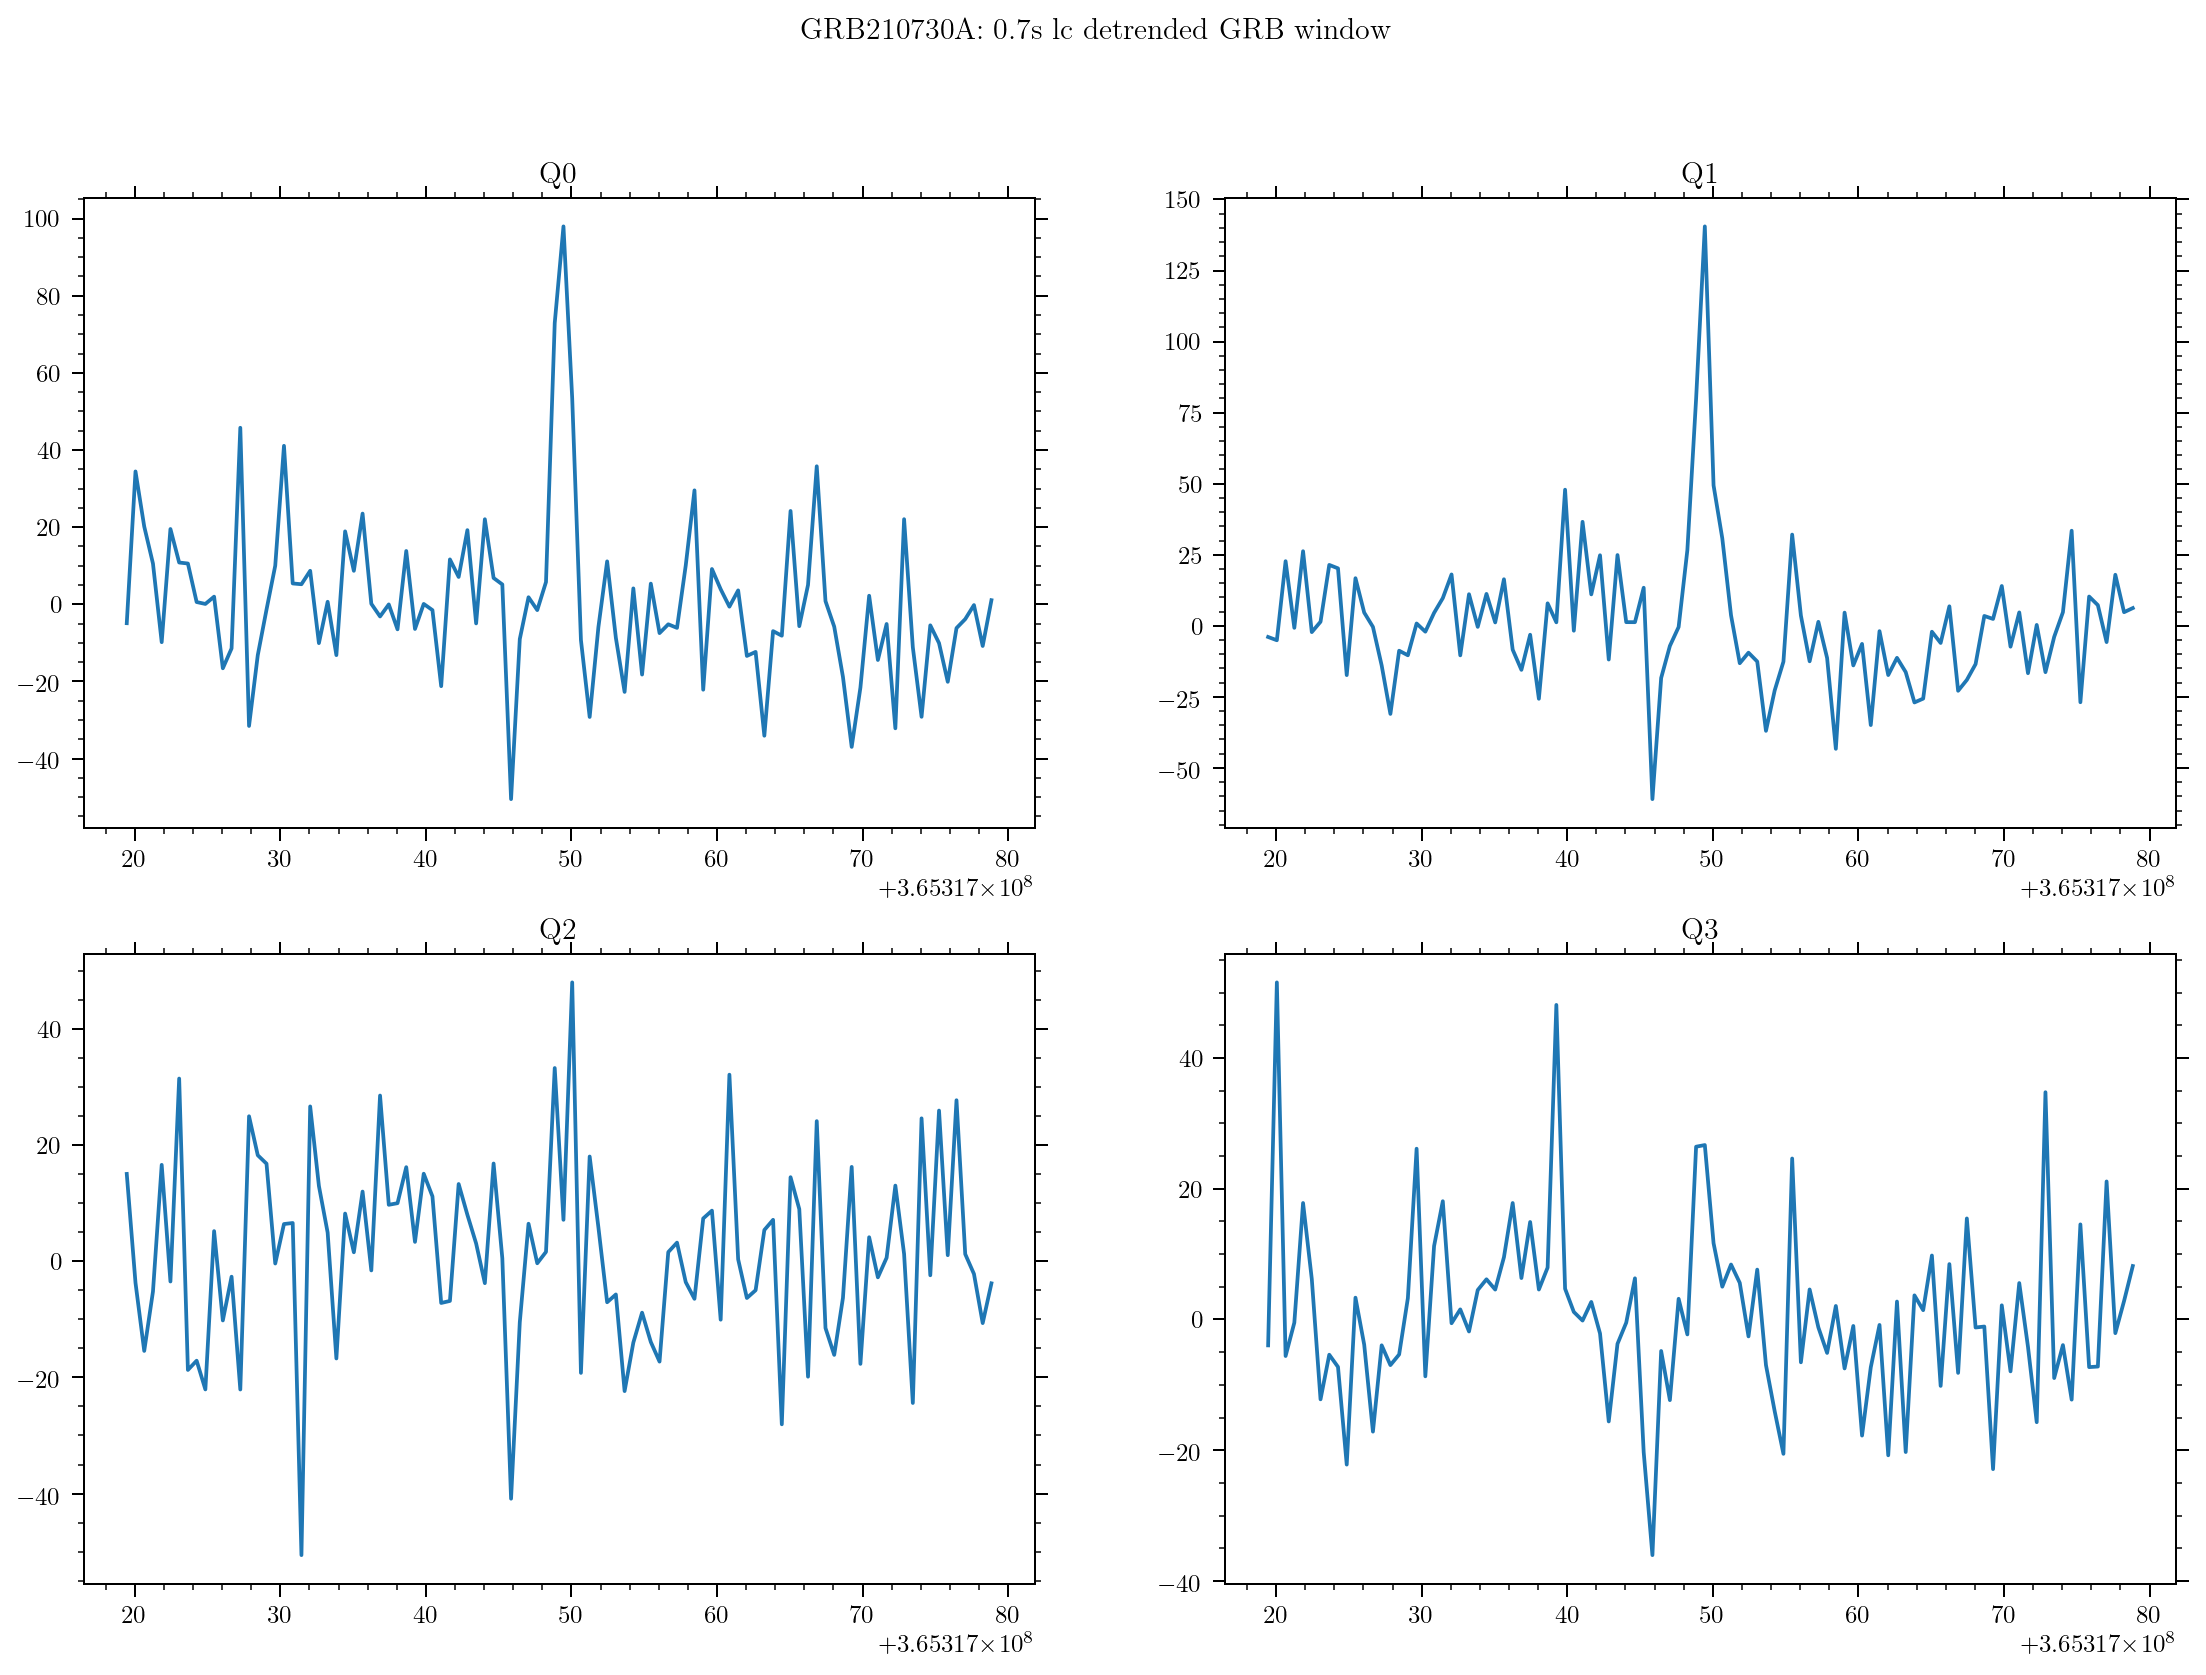

In [77]:
plot_rebin_detrend_grb(0.7, False)

In [78]:
def snr_maxmin(lc_data, grb_ind):
    saa_start_ind, saa_end_ind = get_saa(lc_data)
    noise_max = np.max(lc_data[:saa_start_ind])
    noise_min =  np.min(lc_data[:saa_start_ind])
    peak = lc_data[grb_ind]
    return ((peak/(noise_max-noise_min)), noise_max, noise_min)

In [79]:
def get_maxmin_snr(out_t, flag_sum):  
    snr = []
    if(flag_sum):
        lc_data, grb_ind = data_rebin(out_t, flag_sum)
        snr = snr_maxmin(detrend_func(lc_data, grb_ind, out_t), grb_ind)[0]
    else: 
        lc_data, lc_time, grb_ind = data_rebin(out_t, flag_sum)
        for i in range(4):
            snr.append(snr_maxmin(detrend_func(lc_data[i], grb_ind, out_t), grb_ind)[0]) 
    return snr

In [80]:
get_maxmin_snr(2, False)

[0.336565, 1.0905013, 0.123190336, 0.14438383]

In [81]:
def snr_rms(lc_data, grb_ind):
    saa_start_ind, saa_end_ind = get_saa(lc_data)
    noise_rms = np.sqrt(np.sum(lc_data[:saa_start_ind]**2)/np.size(lc_data[:saa_start_ind]))
    peak = lc_data[grb_ind]
    return ((peak/noise_rms), noise_rms)

In [82]:
def get_rms_snr(out_t, flag_sum):
    snr = []
    if(flag_sum):
        lc_data, grb_ind = data_rebin(out_t, flag_sum)
        snr = snr_rms(detrend_func(lc_data, grb_ind, out_t), grb_ind)[0]
    else: 
        lc_data, lc_time, grb_ind = data_rebin(out_t, flag_sum)
        for i in range(4):
            snr.append(snr_rms(detrend_func(lc_data[i], grb_ind, out_t), grb_ind)[0]) 
    return snr

In [83]:
get_rms_snr(0.6, False)

[5.485168370420299, 5.353724522036993, 2.114076785921052, 2.166409751146382]

In [84]:
def gaussian_fit(lc_data, bins):
    saa_start_ind, saa_end_ind = get_saa(lc_data)
    x_data = lc_data[:saa_start_ind]
    hist, bin_edges = np.histogram(x_data, bins)
    n = len(hist)
    x_hist=np.zeros(n)
    for i in range(n):
        x_hist[i]=(bin_edges[i+1]+bin_edges[i])/2
        
    y_hist=hist

    def gaus(X,C,X_mean,sigma):
        return C*np.exp(-(X-X_mean)**2/(2*sigma**2))

    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

    popt,pcov = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma])

    x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)

    return (popt, x_hist_2, gaus(x_hist_2, *popt), x_data)

In [85]:
def snr_gauss(lc_data, grb_ind, bins):
    A, noise_mean, noise_std = gaussian_fit(lc_data, bins)[0]
    noise_gauss = np.abs(noise_mean+3*noise_std)
    peak = lc_data[grb_ind]
    return ((peak/(noise_gauss)), noise_gauss)

In [86]:
def plot_gauss_fit(out_t, bins, flag_sum):
    if(flag_sum):
        lc_data, grb_ind = data_rebin(out_t, flag_sum)
        plt.figure(dpi=180, figsize=(15,10))
        plt.title('Gaussian fit to Noise - '+str(out_t)+'s')
        popt, x_hist, y_hist, x_data = gaussian_fit(detrend_func(lc_data, grb_ind, out_t), bins)
        plt.plot(x_hist,y_hist,label='Gaussian fit', c='black')
        plt.hist(x_data,bins=100, label='Background Data', edgecolor='black', color='red', alpha=0.5)
    else:
        plt.figure(dpi=180, figsize=(15,10))
        lc_data, lc_time, grb_ind = data_rebin(out_t, flag_sum)
        plt.suptitle('Gaussian fit to Noise - '+str(out_t)+'s')
        for i in range(4):
            popt, x_hist, y_hist, x_data = gaussian_fit(detrend_func(lc_data[i], grb_ind, out_t), bins)
            plt.subplot(2,2,i+1)
            plt.plot(x_hist,y_hist,label='Gaussian fit', c='black')
            plt.hist(x_data,bins=100, label='Background Data', edgecolor='black', color='red', alpha=0.5)
            plt.title('Q' +str(i))
    plt.legend()
    plt.show()

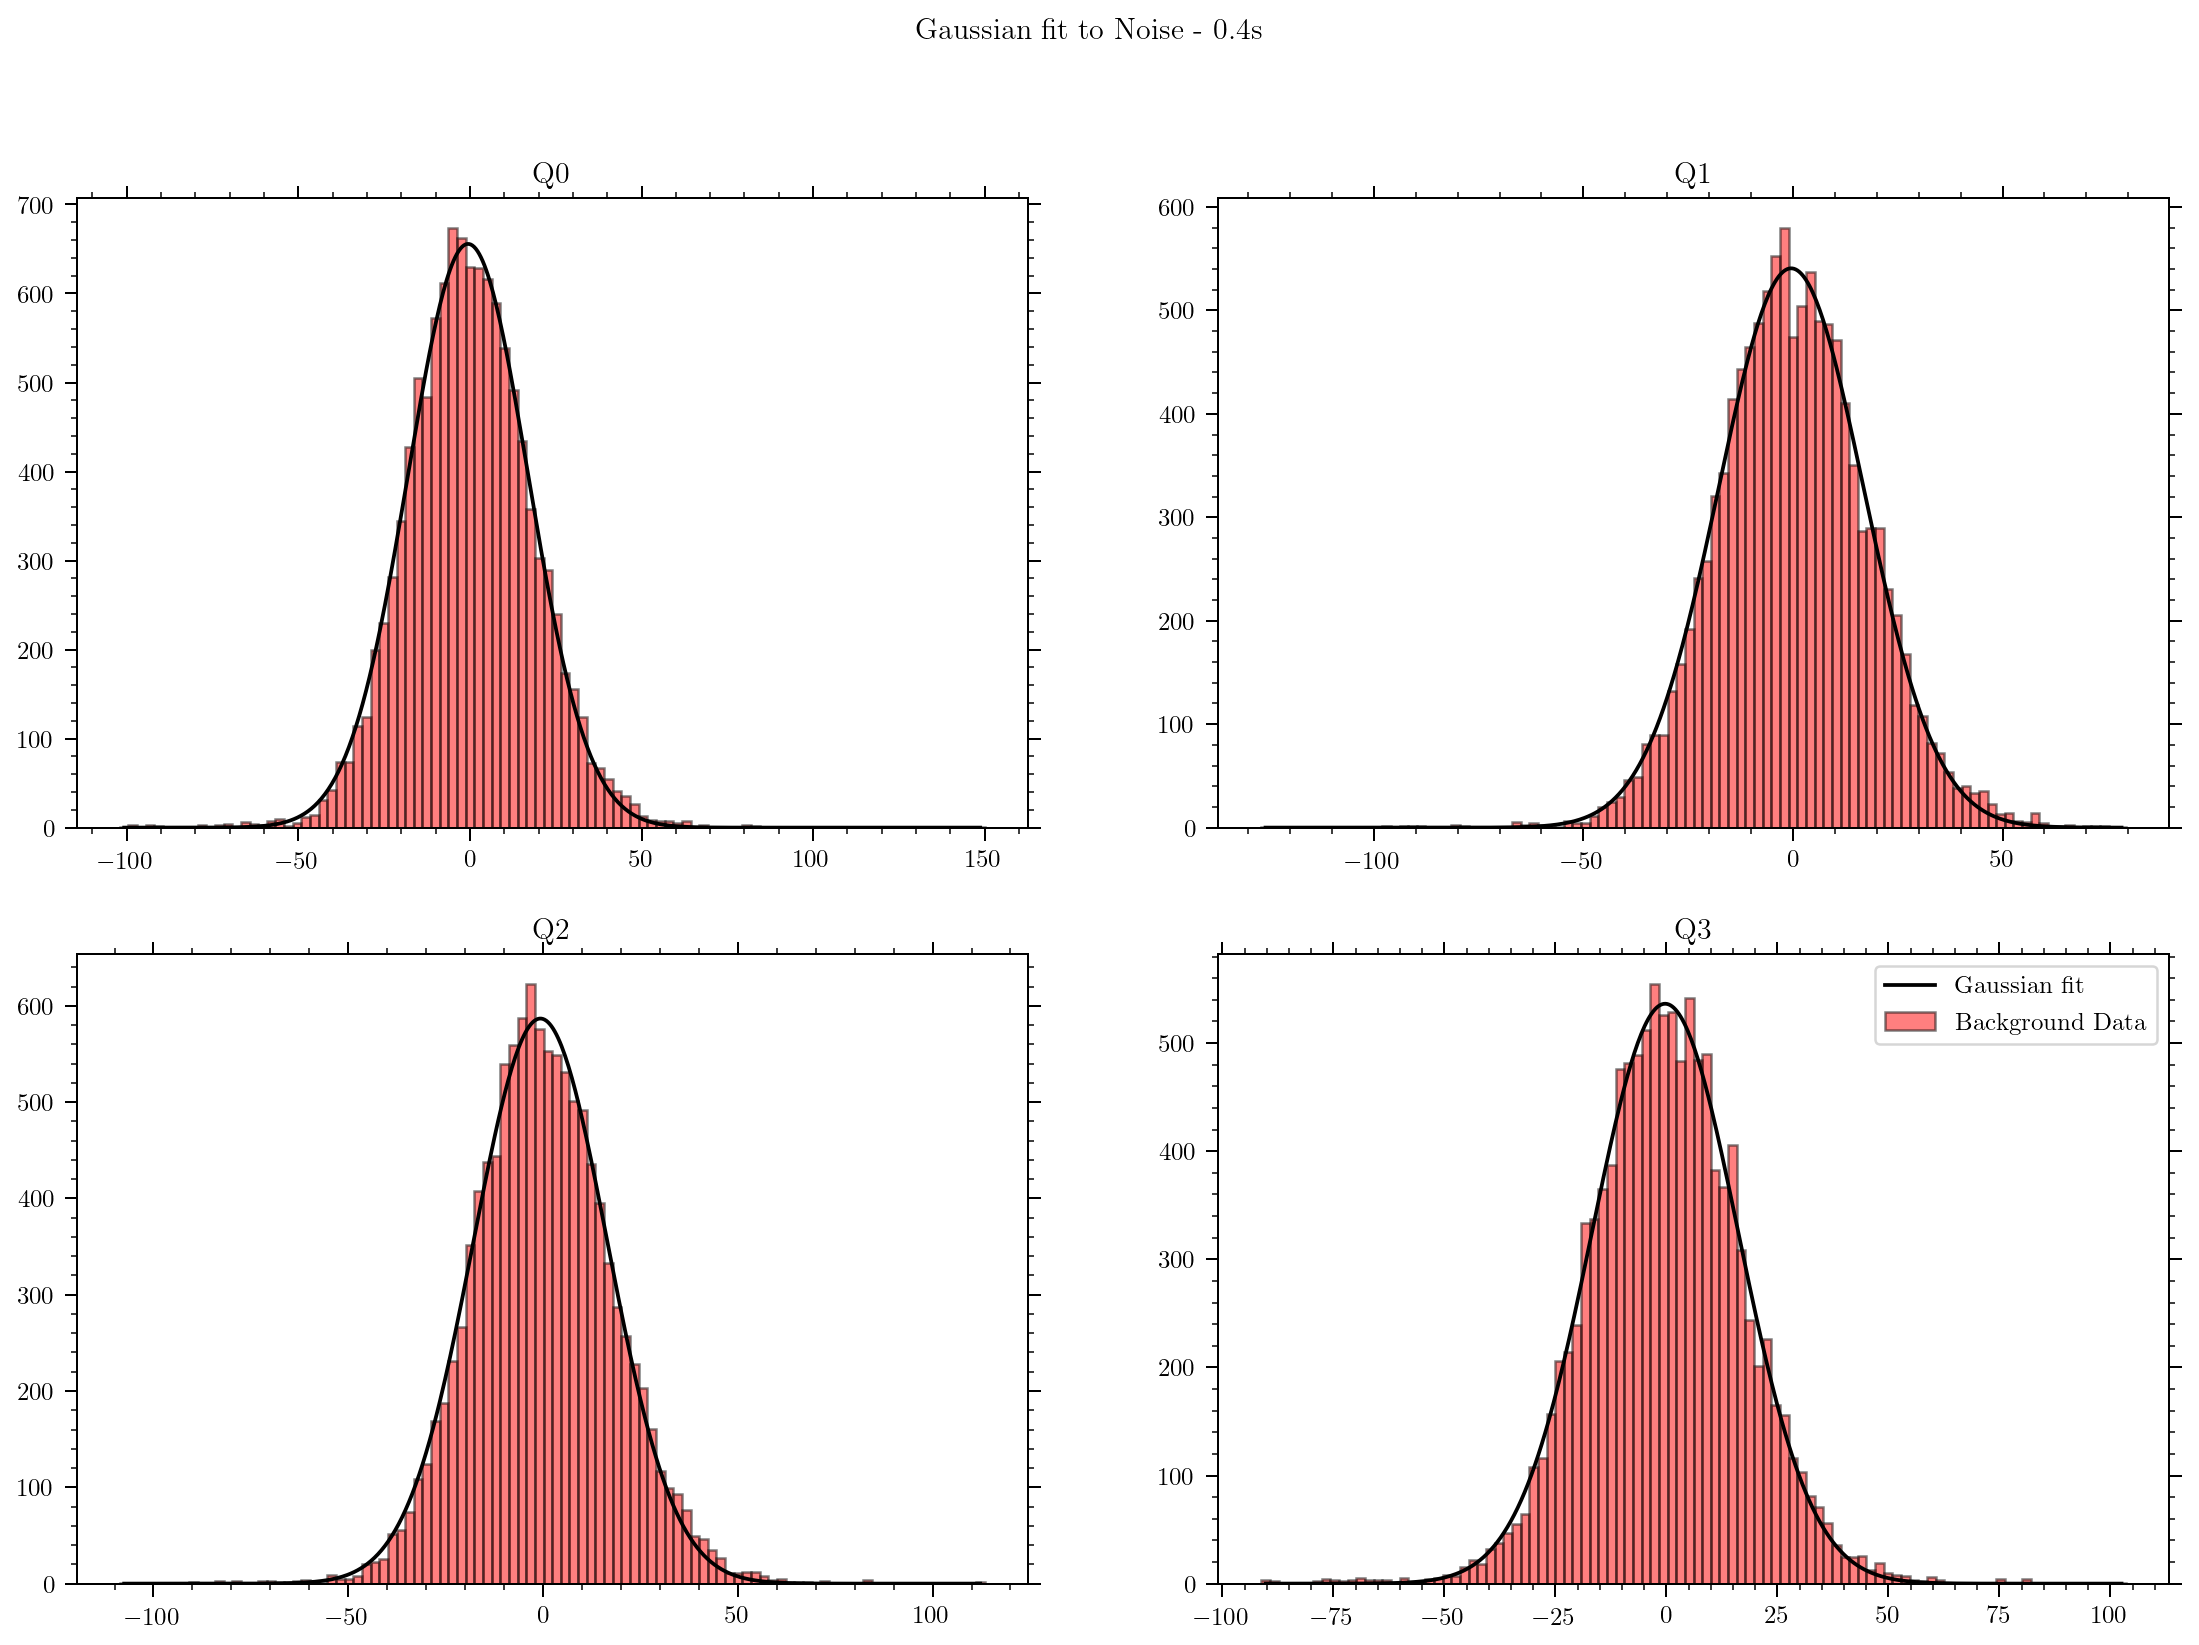

In [87]:
plot_gauss_fit(0.4, 100, False)

In [88]:
def get_gauss_snr(out_t, flag_sum): 
    snr = []   
    if(flag_sum):
        lc_data, grb_ind = data_rebin(out_t, flag_sum)
        snr = snr_gauss(detrend_func(lc_data, grb_ind, out_t), grb_ind, 100)[0]
    else: 
        lc_data, lc_time, grb_ind = data_rebin(out_t, flag_sum)
        for i in range(4):
            snr.append(snr_gauss(detrend_func(lc_data[i], grb_ind, out_t), grb_ind, 100)[0]) 
    return snr

In [89]:
get_gauss_snr(0.4, True)

0.300100412729359

In [90]:
def poisson_fit(lc_data , bins):
    saa_start_ind, saa_end_ind = get_saa(lc_data)
    x_data = lc_data[:saa_start_ind]
    hist, bin_edges = np.histogram(x_data, bins)
    n = len(hist)
    x_hist=np.zeros(n)
    for i in range(n):
        x_hist[i]=(bin_edges[i+1]+bin_edges[i])/2

    x_hist = np.array([int(x_hist[i]) for i in range(0, np.size(x_hist))])
    y_hist=hist
    offset = np.std(x_data)**2
    x_hist = x_hist + offset
    
    def pois(X, C, l):
        return C*poisson.pmf(X,l)

    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

    popt,pcov = curve_fit(pois,x_hist.astype(int),y_hist, p0=[max(y_hist), offset])

    x_hist_2=np.arange(int(np.min(x_hist)),int(np.max(x_hist)))

    return (popt, x_hist_2, pois(x_hist_2, *popt), x_data, offset)

In [91]:
def plot_poisson_fit(out_t, bins, flag_sum):
    if(flag_sum):
        lc_data, grb_ind = data_rebin(out_t, flag_sum)
        plt.figure(dpi=180, figsize=(15,10))
        plt.title('Poisson fit to Noise - '+str(out_t)+'s')
        popt, x_hist, y_hist, x_data, offset = poisson_fit(detrend_func(lc_data, grb_ind, out_t), bins)
        plt.plot(x_hist,y_hist,label='Poisson fit', c='black')
        plt.hist(x_data,bins=100, label='Background Data', edgecolor='black', color='red', alpha=0.5)
    else:
        plt.figure(dpi=180, figsize=(15,10))
        lc_data, lc_time, grb_ind = data_rebin(out_t, flag_sum)
        plt.suptitle('Poisson fit to Noise - '+str(out_t)+'s')
        for i in range(4):
            popt, x_hist, y_hist, x_data, offset = poisson_fit(detrend_func(lc_data[i], grb_ind, out_t), bins)
            plt.subplot(2,2,i+1)
            plt.plot(x_hist-offset,y_hist,label='Poisson fit', c='black')
            plt.hist(x_data,bins=bins, label='Background Data', edgecolor='black', color='red', alpha=0.5)
            plt.title('Q' +str(i))
    plt.legend()
    plt.show()

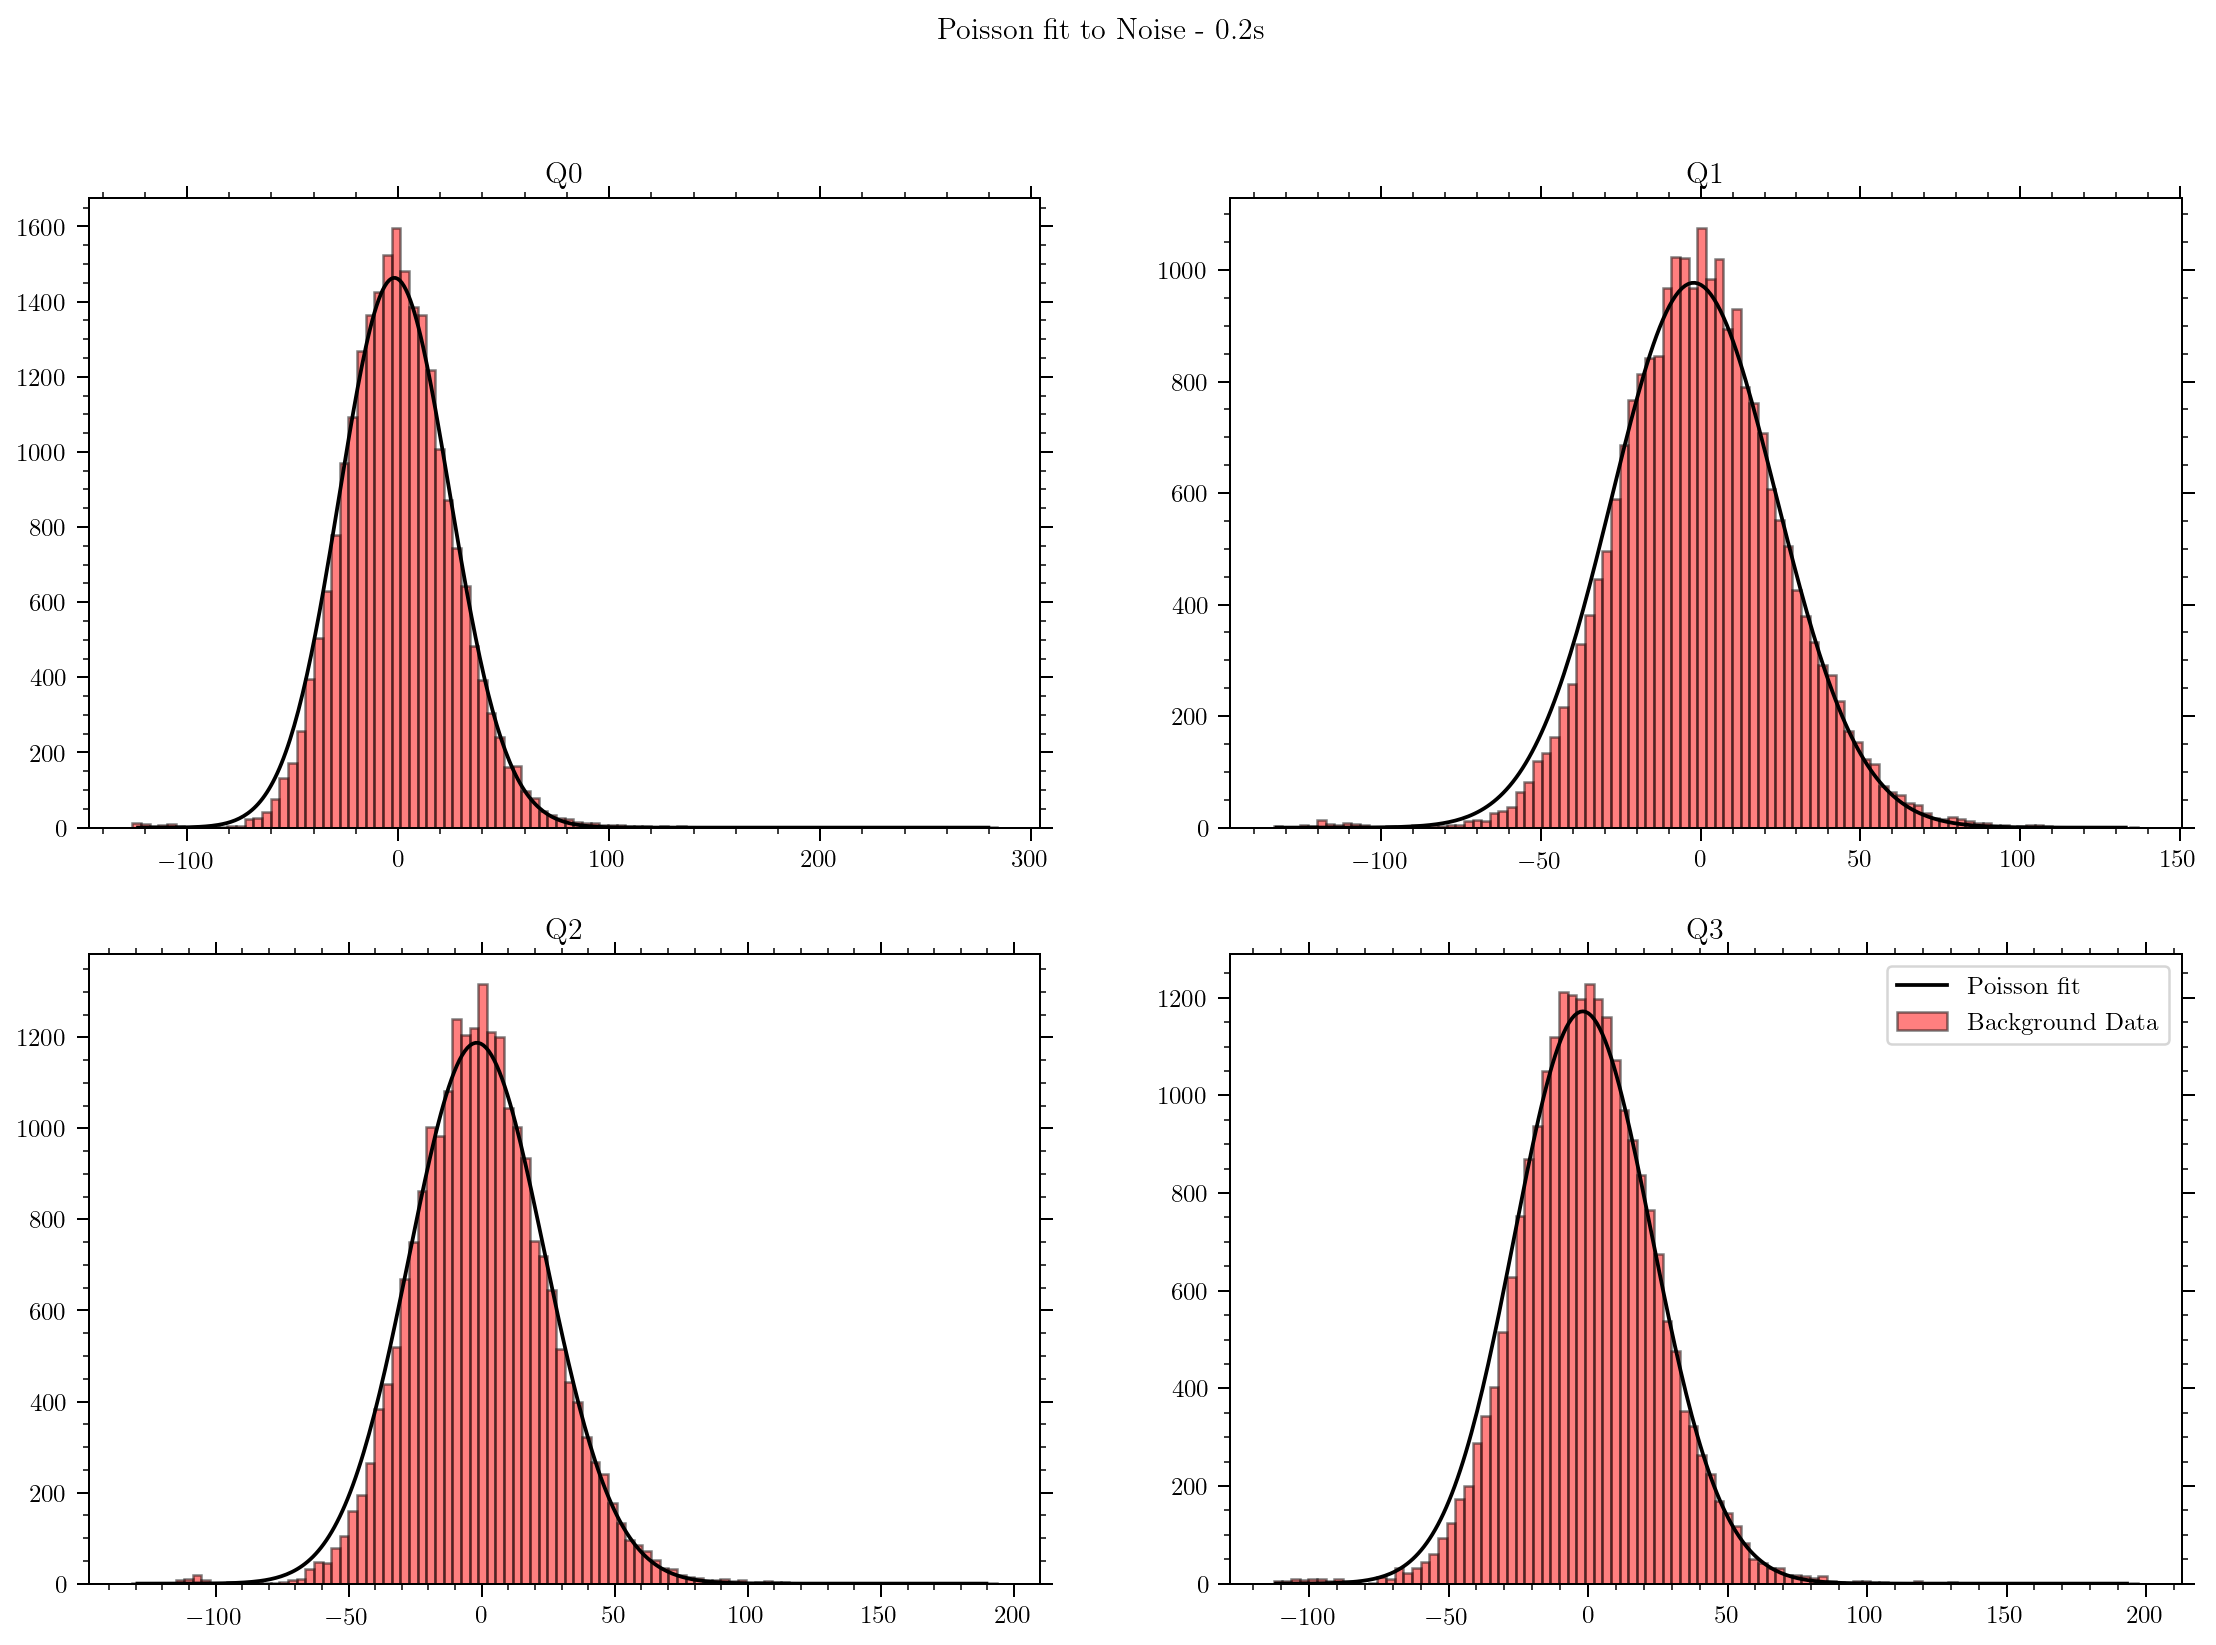

In [92]:
plot_poisson_fit(0.2, 100, False)

In [93]:
def snr_poisson(lc_data, grb_ind, bins):
    A, noise_mean = poisson_fit(lc_data, bins)[0]
    offset = poisson_fit(lc_data, bins)[-1]
    noise_std = np.sqrt(noise_mean)
    noise_gauss = np.abs((noise_mean-offset)+3*noise_std)
    peak = np.abs(lc_data[grb_ind])
    return ((peak/(noise_gauss)), noise_gauss)

In [94]:
def get_poisson_snr(out_t, flag_sum):
    snr = []
    if(flag_sum):
        lc_data, grb_ind = data_rebin(out_t, flag_sum)
        snr = snr_poisson(detrend_func(lc_data, grb_ind, out_t), grb_ind, 100)[0]
    else: 
        lc_data, lc_time, grb_ind = data_rebin(out_t, flag_sum)
        for i in range(4):
            snr.append(snr_poisson(detrend_func(lc_data[i], grb_ind, out_t), grb_ind, 100)[0])
    return snr

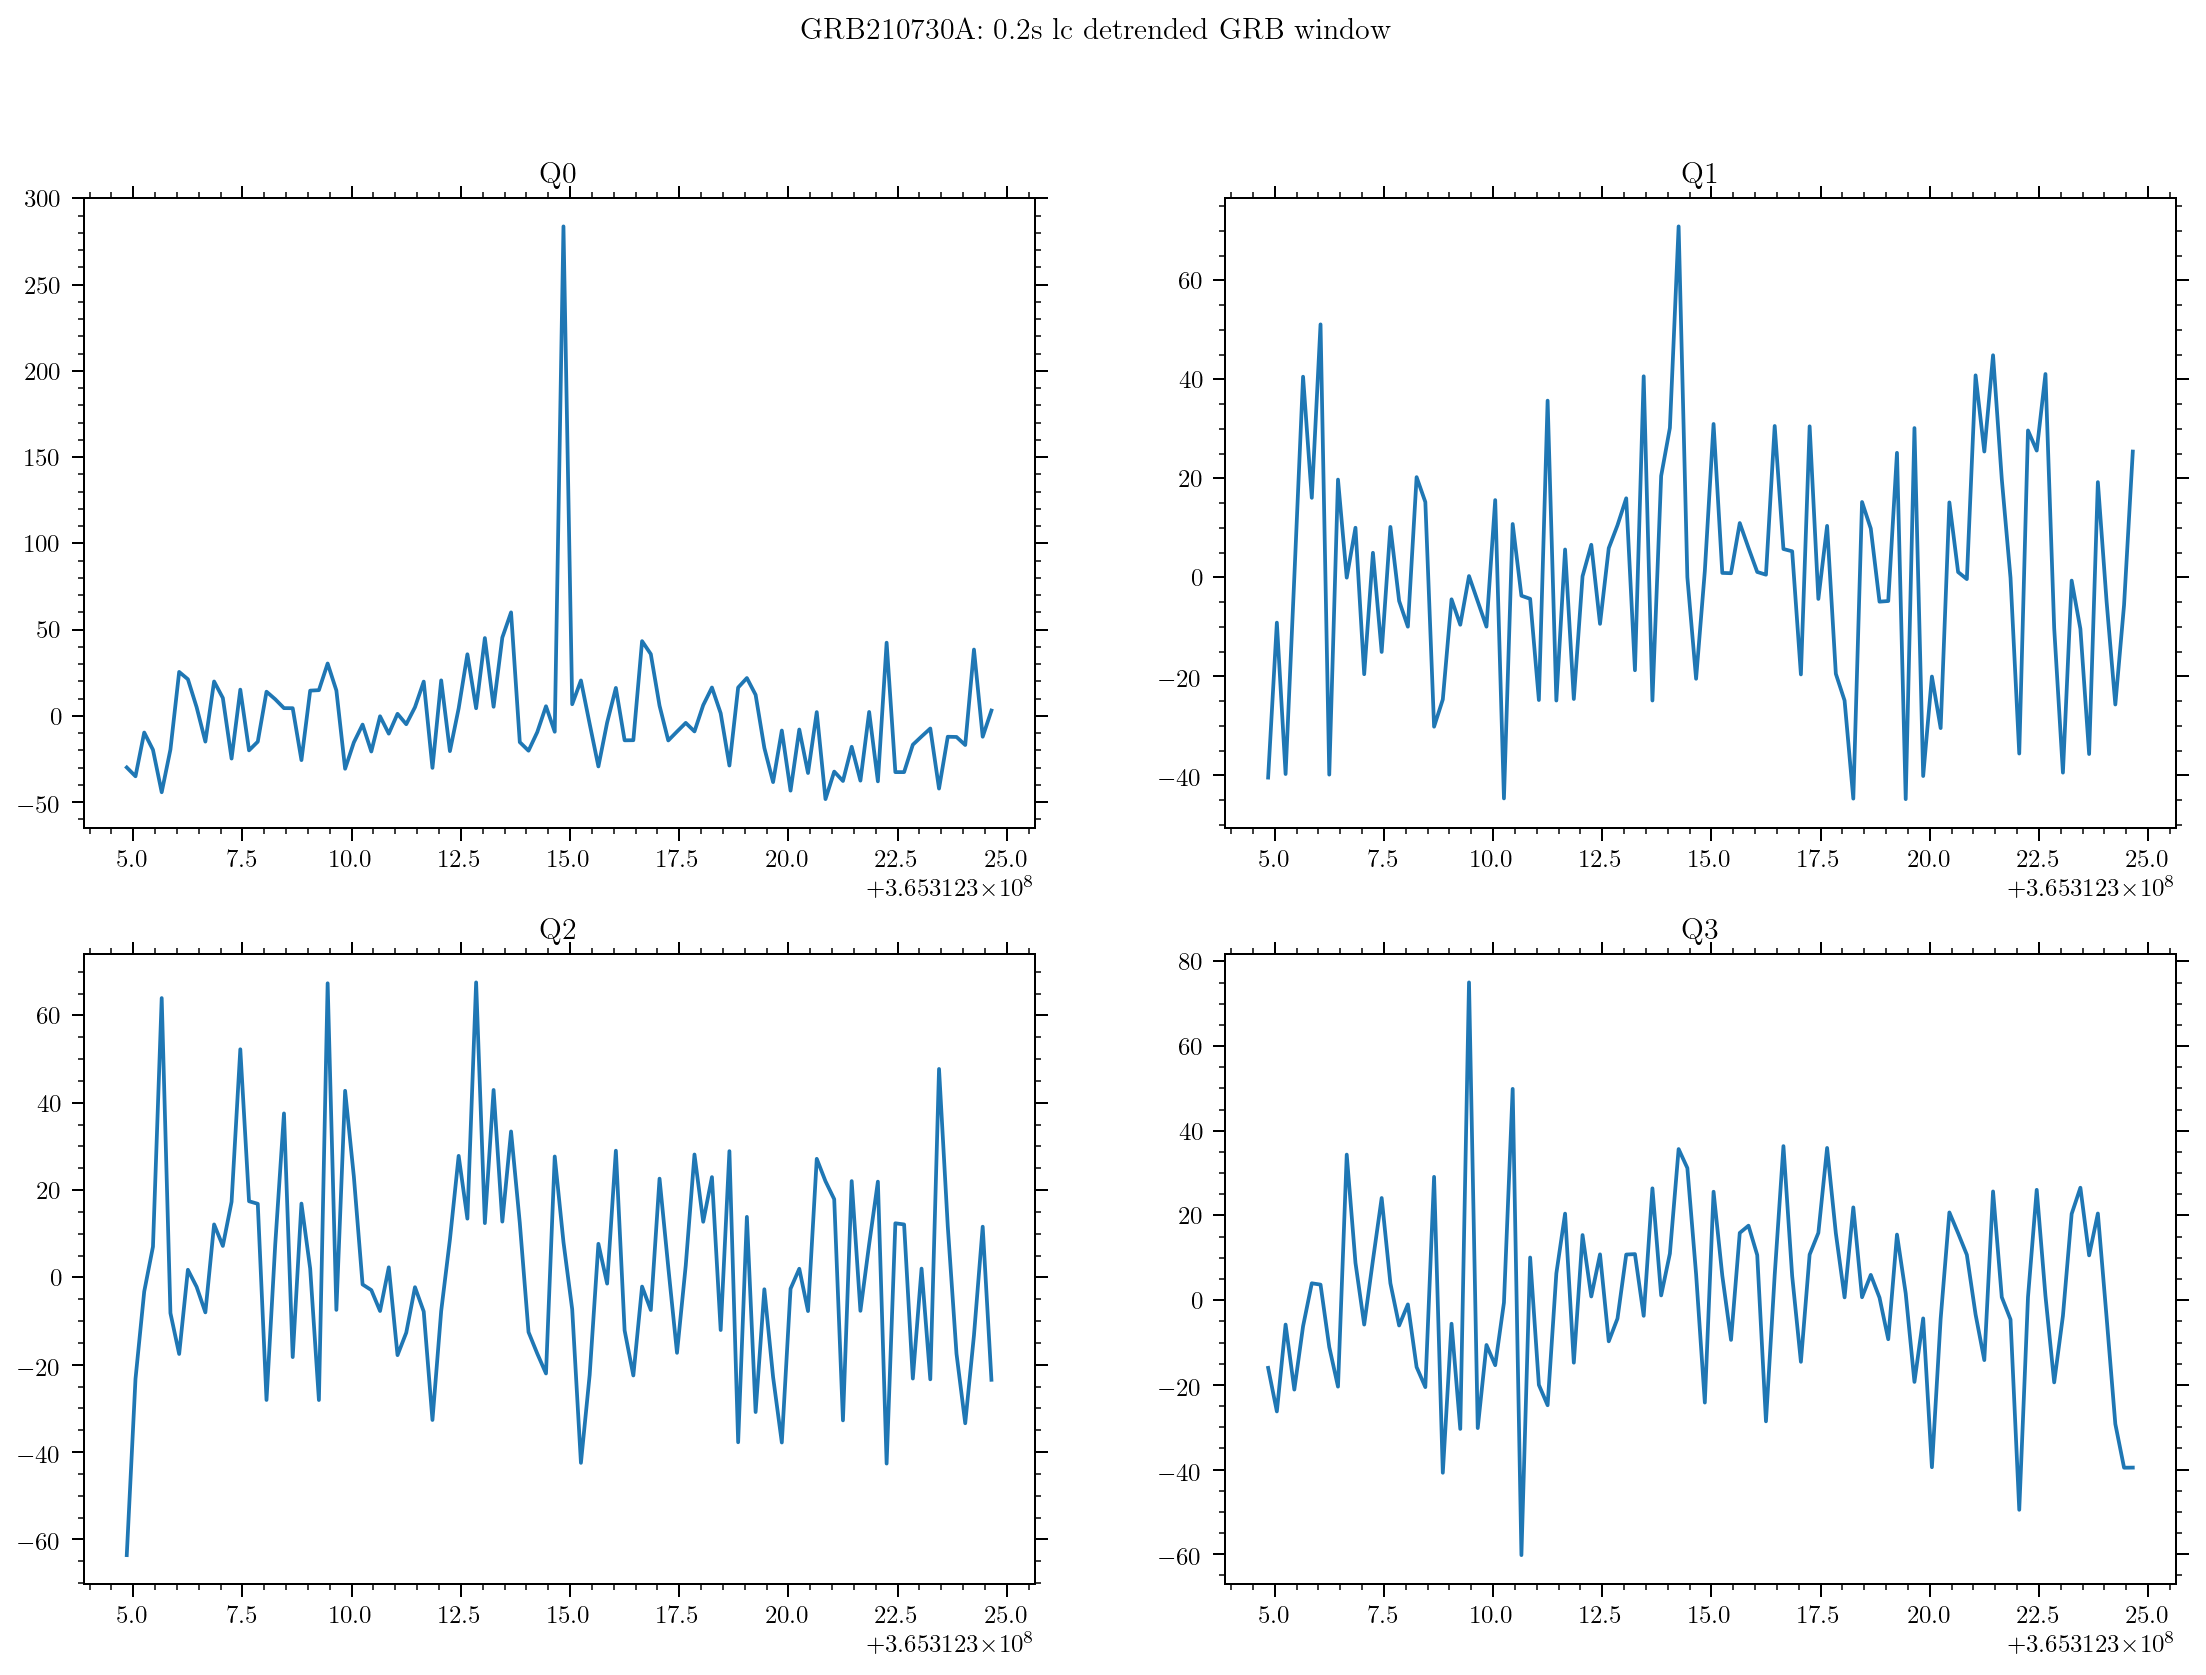

In [95]:
plot_rebin_detrend_grb(0.2, False)

In [100]:
maxmin_snrs = []
rms_snrs = []
gauss_snrs = []
poisson_snrs = []
time_bins = np.arange(0.1, 1, 0.1)
for i in time_bins:
    maxmin_snrs.append(get_maxmin_snr(i, True))
    rms_snrs.append(get_rms_snr(i, True))
    gauss_snrs.append(get_gauss_snr(i, True))
    poisson_snrs.append(get_poisson_snr(i, True))


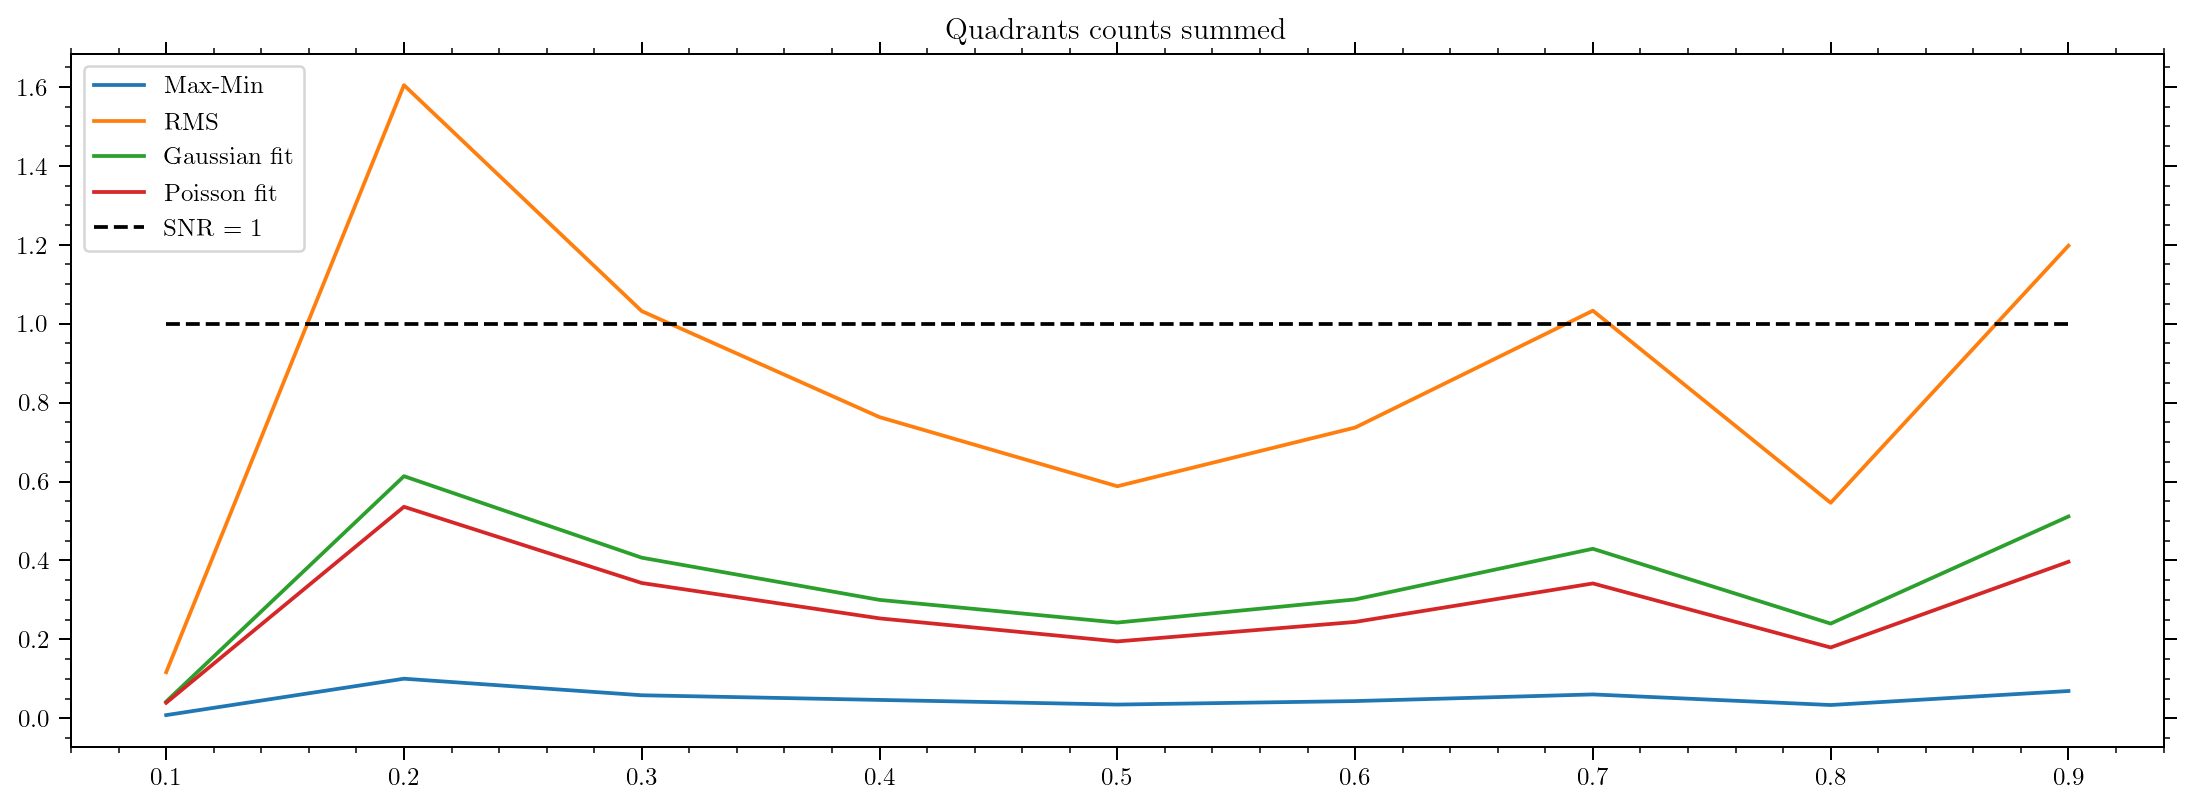

In [98]:
plt.figure(dpi=180, figsize=(15,5))
plt.plot(time_bins, maxmin_snrs)
plt.plot(time_bins, rms_snrs)
plt.plot(time_bins, gauss_snrs)
plt.plot(time_bins, poisson_snrs)
plt.plot(time_bins, np.ones_like(time_bins), 'k--')
plt.legend(['Max-Min', 'RMS', 'Gaussian fit', 'Poisson fit', 'SNR = 1'])
plt.title('Quadrants counts summed')
plt.show()